In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
import pandas as pd
from src.utils.config import FEATURES
from src.utils.get_data import import_data

sns.set_theme('notebook')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [6]:
DATA_PATH = './data'

X, y = import_data(path=DATA_PATH, segmentation_type='fine')

display(X, y)

EEPD50_100  EEPD100_150  \
subject                              file_id                            
008ba489-31ad-44d8-856b-fcf72369dc46 0               6.0          6.0   
                                     1               3.0          3.0   
                                     2               4.0          4.0   
                                     3               4.0          4.0   
                                     4               4.0          4.0   
...                                                  ...          ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1               5.0          5.0   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0               4.0          4.0   
                                     1               4.0          4.0   
                                     2               3.0          2.0   
                                     3               4.0          5.0   

                                              EEPD150_200  EEPD200_250  \
subject                              file_id                             
008ba489-31ad-44d8-856b-fcf72369dc46 0                5.0          4.0   
                                     1                3.0          4.0   
                                     2                3.0          4.0   
                                     3                4.0          4.0   
                                     4                5.0          4.0   
...                                                   ...          ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                6.0          6.0   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                4.0          3.0   
                                     1                3.0          3.0   
                                     2                2.0          2.0   
                                     3                5.0          5.0   

                                              EEPD250_300  EEPD300_350  \
subject                              file_id                             
008ba489-31ad-44d8-856b-fcf72369dc46 0                5.0          5.0   
                                     1                4.0          5.0   
                                     2                3.0          3.0   
                                     3                4.0          5.0   
                                     4                4.0          5.0   
...                                                   ...          ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                5.0          5.0   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                2.0          3.0   
                                     1                3.0          4.0   
                                     2                3.0          4.0   
                                     3                5.0          5.0   

                                              EEPD350_400  EEPD400_450  \
subject                              file_id                             
008ba489-31ad-44d8-856b-fcf72369dc46 0                6.0          6.0   
                                     1                4.0          4.0   
                                     2                4.0          4.0   
                                     3                3.0          4.0   
                                     4                3.0          4.0   
...                                                   ...          ...   
ff8bfcc9-3df2-4752-8280-63f023fba31c 1                5.0          5.0   
ffa718e8-da65-4602-8da8-cda7cdc568f2 0                3.0          3.0   
                                     1                4.0          4.0   
                                     2                3.0          4.0   
                                     3                5.0          4.0   

                                              EEPD450_500  EEPD500_550  ...  \
subject                              file_id                            ...   
008ba489-31ad-44d8-856b-fcf72369dc46 0           

Label
subject                              file_id       
008ba489-31ad-44d8-856b-fcf72369dc46 0          1.0
                                     1          1.0
                                     2          1.0
                                     3          1.0
                                     4          1.0
...                                             ...
ff8bfcc9-3df2-4752-8280-63f023fba31c 1          0.0
ffa718e8-da65-4602-8da8-cda7cdc568f2 0          0.0
                                     1          0.0
                                     2          0.0
                                     3          0.0

[7009 rows x 1 columns]

In [7]:
# shape
X.shape

(7009, 70)

In [8]:
# check features and datatype
X.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7009 entries, ('008ba489-31ad-44d8-856b-fcf72369dc46', '0') to ('ffa718e8-da65-4602-8da8-cda7cdc568f2', '3')
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EEPD50_100          7009 non-null   float64
 1   EEPD100_150         7009 non-null   float64
 2   EEPD150_200         7009 non-null   float64
 3   EEPD200_250         7009 non-null   float64
 4   EEPD250_300         7009 non-null   float64
 5   EEPD300_350         7009 non-null   float64
 6   EEPD350_400         7009 non-null   float64
 7   EEPD400_450         7009 non-null   float64
 8   EEPD450_500         7009 non-null   float64
 9   EEPD500_550         7009 non-null   float64
 10  EEPD550_600         7009 non-null   float64
 11  EEPD600_650         7009 non-null   float64
 12  EEPD650_700         7009 non-null   float64
 13  EEPD700_750         7009 non-null   float64
 14  EEPD750_800        

In [25]:
# spread
display(X.describe())

,EEPD50_100,EEPD100_150,EEPD150_200,EEPD200_250,EEPD250_300,EEPD300_350,EEPD350_400,EEPD400_450,EEPD450_500,EEPD500_550,EEPD550_600,EEPD600_650,EEPD650_700,EEPD700_750,EEPD750_800,EEPD800_850,EEPD850_900,EEPD900_950,EEPD950_1000,Zero_Crossing_Rate,RMS_Power,Dominant_Freq,Spectral_Centroid,Spectral_Rolloff,Spectral_Spread,Spectral_Skewness,Spectral_Kurtosis,Spectral_Bandwidth,Spectral_Flatness,Spectral_StDev,Spectral_Slope,Spectral_Decrease,MFCC_mean0,MFCC_mean1,MFCC_mean2,MFCC_mean3,MFCC_mean4,MFCC_mean5,MFCC_mean6,MFCC_mean7,MFCC_mean8,MFCC_mean9,MFCC_mean10,MFCC_mean11,MFCC_mean12,MFCC_std0,MFCC_std1,MFCC_std2,MFCC_std3,MFCC_std4,MFCC_std5,MFCC_std6,MFCC_std7,MFCC_std8,MFCC_std9,MFCC_std10,MFCC_std11,MFCC_std12,Crest_Factor,Cough_Length,PSD_225-425,PSD_450-550,PSD_1325-1600,PSD_1600-1900,PSD_2500-2900,PSD_3100-3700,Age,Gender,Resp_Condition,Symptoms
count,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7.009000e+03,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7.009000e+03,7.009000e+03,7009.000000,7009.000000,7.009000e+03,7.009000e+03,7009.000000,7009.000000,7009.000000,7009.000000
mean,4.351833,4.360964,4.412470,4.473962,4.503781,4.521758,4.554002,4.593523,4.609645,4.618205,4.586960,4.588101,4.594807,4.572264,4.580254,4.573406,4.555001,4.555429,4.543016,0.200629,0.154245,0.045842,1607.641866,2793.571694,1274.387337,0.994473,3.490266,220494.926636,0.054266,1.566955e-05,-0.003403,0.001445,-178.395108,77.343613,-33.913483,14.562982,-24.037267,2.696056,-34.390015,1.423676,-20.253058,1.488008,-16.679560,2.753709,-14.848714,175.308723,35.170709,26.886334,16.729098,18.791570,13.879168,16.509145,12.671308,13.670540,10.665760,11.512604,9.742281,10.997064,6.211998,0.671730,2.294744e-01,9.386090e-02,0.060585,0.048999,2.073963e-02,2.870803e-02,34.430037,0.389357,0.293480,0.248966
std,1.278799,1.268739,1.276464,1.279308,1.303323,1.288280,1.326851,1.343370,1.341938,1.344187,1.338385,1.335001,1.345085,1.343939,1.364353,1.359921,1.346347,1.346011,1.344662,0.069759,0.058672,0.042739,386.173984,773.778183,201.556427,0.571171,2.410549,85110.939151,0.044821,1.396188e-05,0.001722,0.000867,77.446570,31.867123,23.553308,18.441615,16.750245,13.533540,13.510332,12.365952,11.062256,9.916264,9.112644,8.736153,8.254732,55.295105,13.629841,10.822398,6.528671,6.759861,5.043426,5.912030,4.538516,4.462986,3.785210,3.770018,3.552492,3.643627,2.016748,0.149396,1.638755e-01,9.938841e-02,0.075247,0.065329,3.192758e-02,4.276823e-02,11.797510,0.451871,0.419252,0.394210
min,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.035926,0.028684,0.007812,340.432499,393.000000,395.986337,-1.868391,1.262276,31518.456579,0.000018,3.223556e-07,-0.012483,-0.041083,-443.409607,-139.357544,-130.052444,-56.869621,-101.602509,-49.361855,-93.537277,-48.838482,-62.119564,-44.807423,-54.342449,-30.882631,-48.215122,18.265102,4.905429,4.458812,2.686615,3.507374,3.171909,2.989322,2.440262,2.878752,2.236578,1.698506,1.872166,2.568807,1.914327,0.500083,6.137005e-07,7.349431e-07,0.000001,0.000006,7.740565e-08,4.191298e-07,1.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.151263,0.112598,0.019531,1351.50

In [14]:
# missing values
X.isnull().sum()

EEPD50_100            0
EEPD100_150           0
EEPD150_200           0
EEPD200_250           0
EEPD250_300           0
EEPD300_350           0
EEPD350_400           0
EEPD400_450           0
EEPD450_500           0
EEPD500_550           0
EEPD550_600           0
EEPD600_650           0
EEPD650_700           0
EEPD700_750           0
EEPD750_800           0
EEPD800_850           0
EEPD850_900           0
EEPD900_950           0
EEPD950_1000          0
Zero_Crossing_Rate    0
RMS_Power             0
Dominant_Freq         0
Spectral_Centroid     0
Spectral_Rolloff      0
Spectral_Spread       0
Spectral_Skewness     0
Spectral_Kurtosis     0
Spectral_Bandwidth    0
Spectral_Flatness     0
Spectral_StDev        0
Spectral_Slope        0
Spectral_Decrease     0
MFCC_mean0            0
MFCC_mean1            0
MFCC_mean2            0
MFCC_mean3            0
MFCC_mean4            0
MFCC_mean5            0
MFCC_mean6            0
MFCC_mean7            0
MFCC_mean8            0
MFCC_mean9      

In [16]:
# duplicates
duplicate = X.duplicated()
print(duplicate.sum())

0


Index(['EEPD50_100', 'EEPD100_150', 'EEPD150_200', 'EEPD200_250',
       'EEPD250_300', 'EEPD300_350', 'EEPD350_400', 'EEPD400_450',
       'EEPD450_500', 'EEPD500_550', 'EEPD550_600', 'EEPD600_650',
       'EEPD650_700', 'EEPD700_750', 'EEPD750_800', 'EEPD800_850',
       'EEPD850_900', 'EEPD900_950', 'EEPD950_1000', 'Zero_Crossing_Rate',
       'RMS_Power', 'Dominant_Freq', 'Spectral_Centroid', 'Spectral_Rolloff',
       'Spectral_Spread', 'Spectral_Skewness', 'Spectral_Kurtosis',
       'Spectral_Bandwidth', 'Spectral_Flatness', 'Spectral_StDev',
       'Spectral_Slope', 'Spectral_Decrease', 'MFCC_mean0', 'MFCC_mean1',
       'MFCC_mean2', 'MFCC_mean3', 'MFCC_mean4', 'MFCC_mean5', 'MFCC_mean6',
       'MFCC_mean7', 'MFCC_mean8', 'MFCC_mean9', 'MFCC_mean10', 'MFCC_mean11',
       'MFCC_mean12', 'MFCC_std0', 'MFCC_std1', 'MFCC_std2', 'MFCC_std3',
       'MFCC_std4', 'MFCC_std5', 'MFCC_std6', 'MFCC_std7', 'MFCC_std8',
       'MFCC_std9', 'MFCC_std10', 'MFCC_std11', 'MFCC_std12', 'Crest

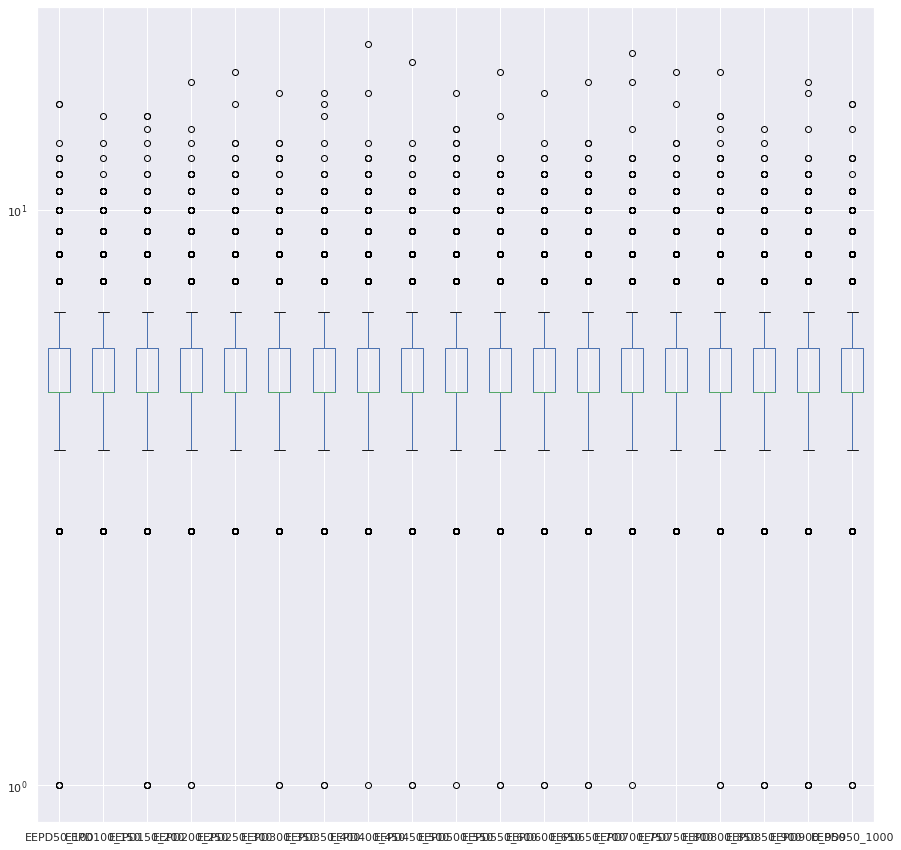

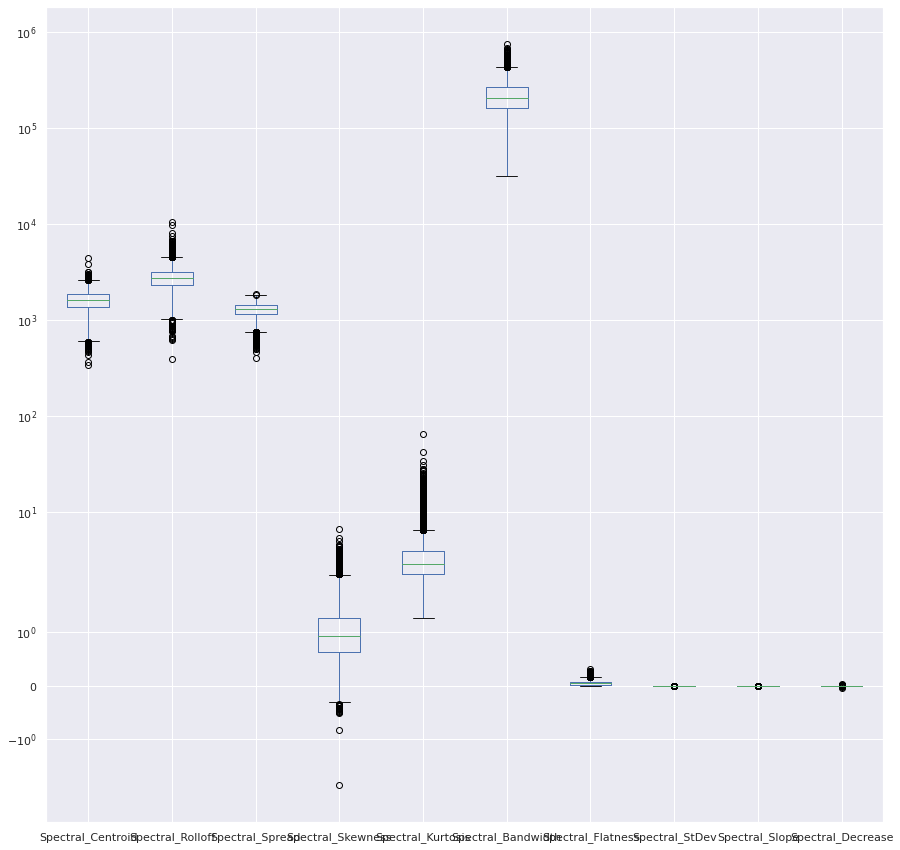

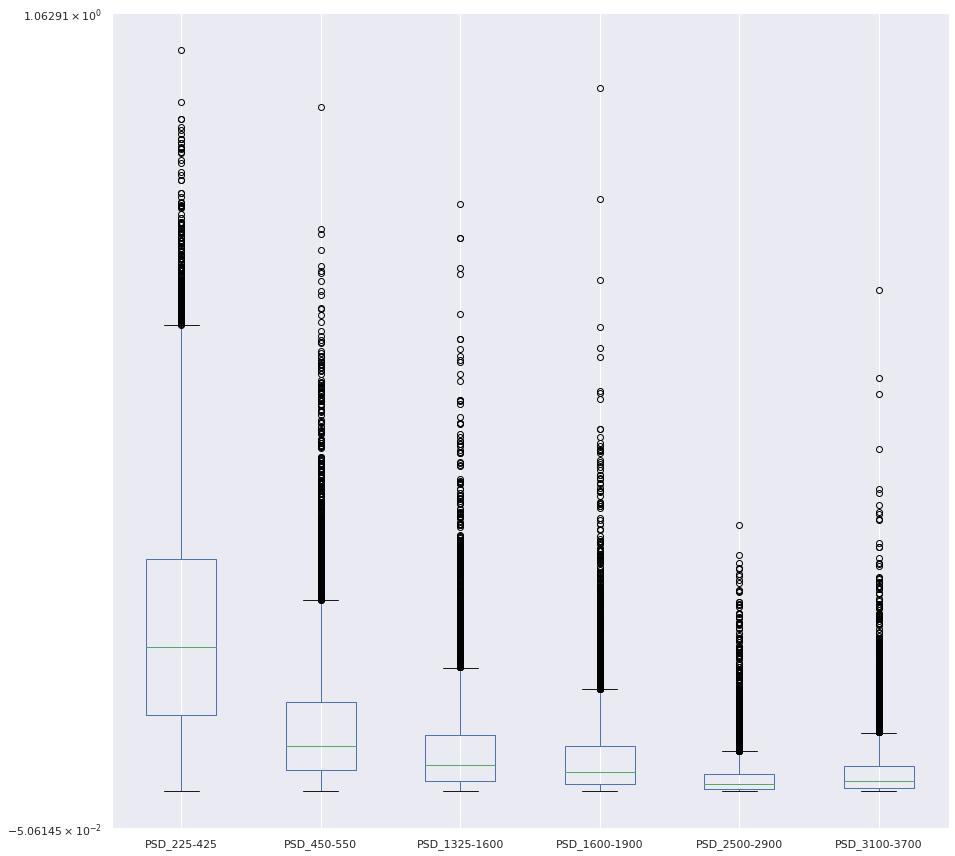

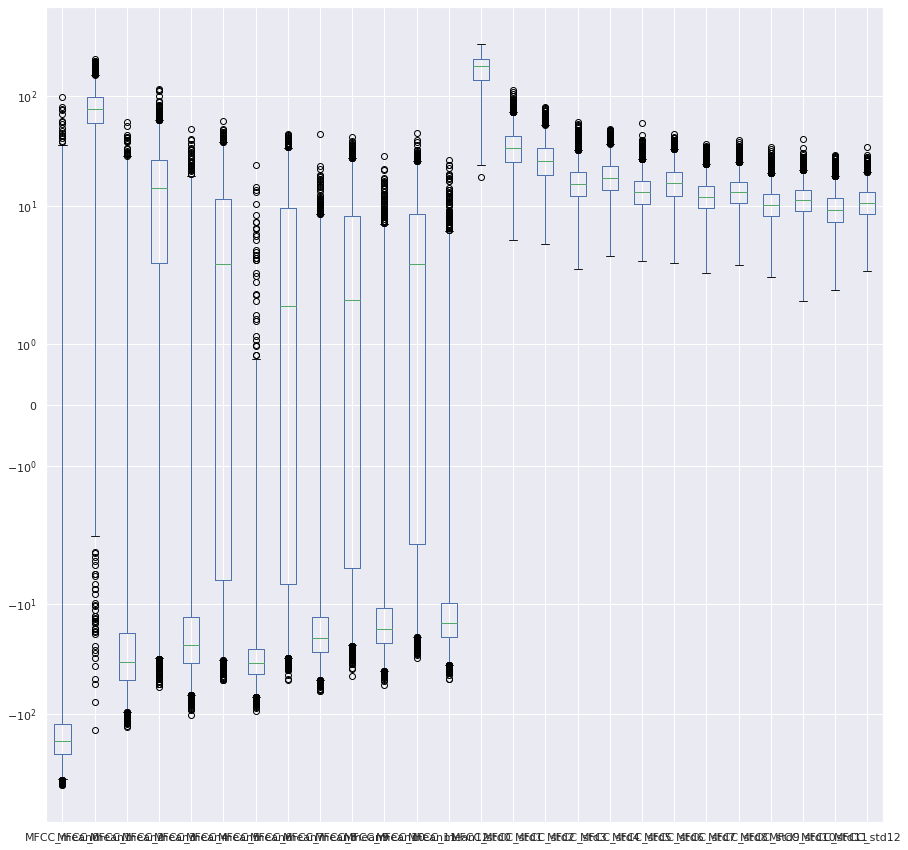

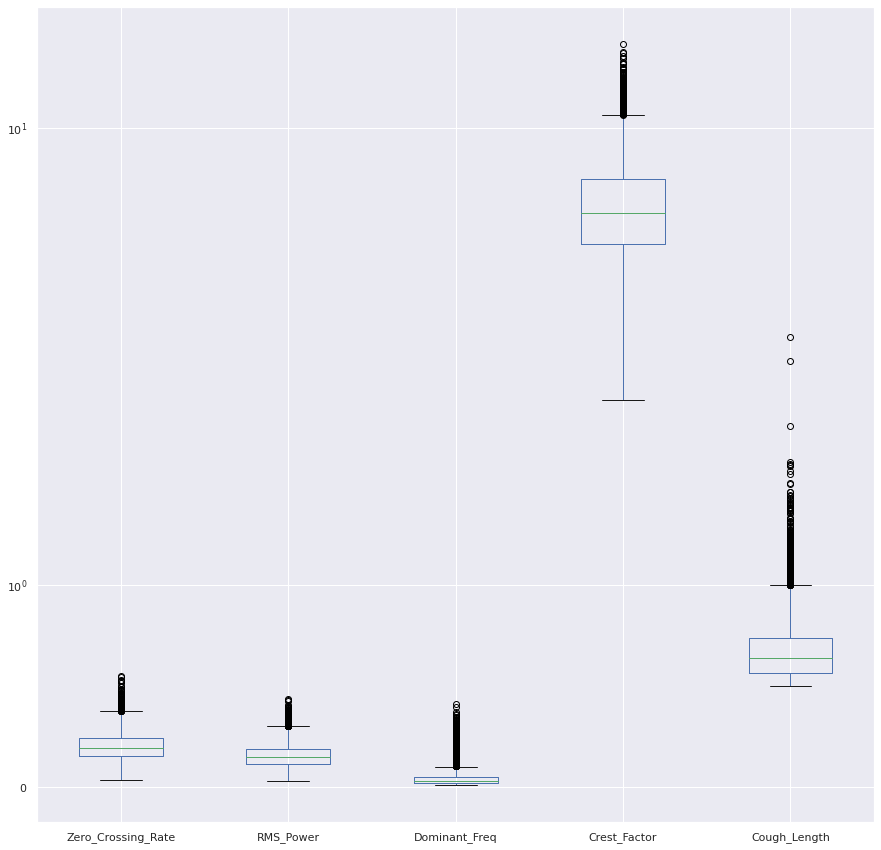

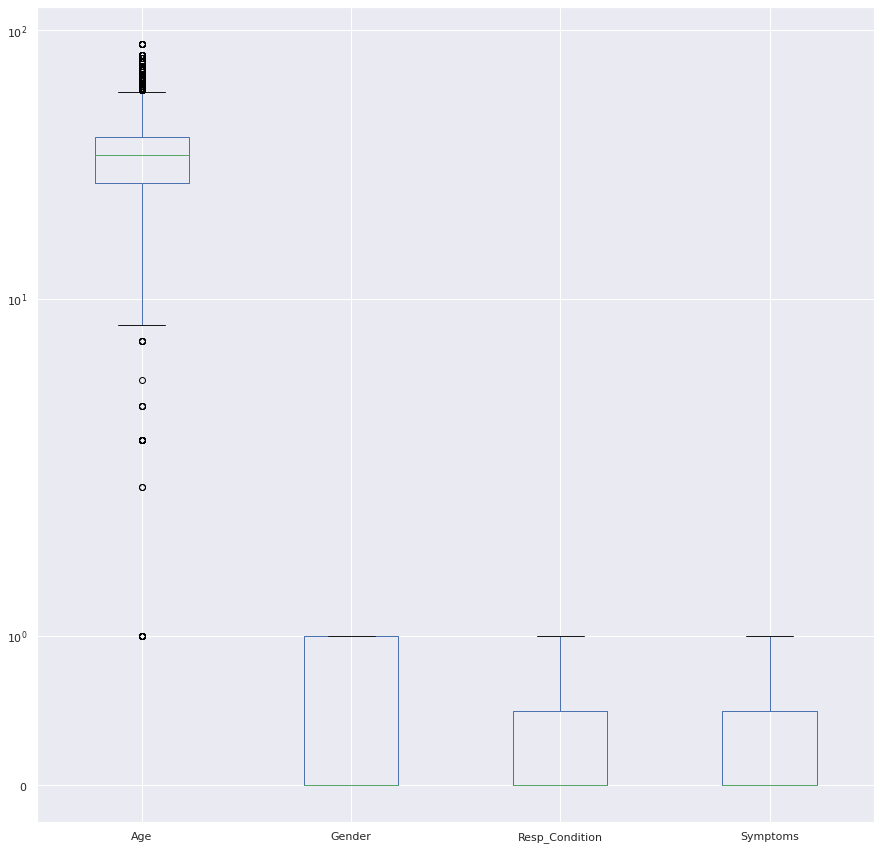

In [43]:
# boxplots
print(X.columns)
for top, features in FEATURES.items():
    print(top, features)
    if "SNR" in features and not "SNR" in X.columns:
        features.remove("SNR")
    X[features].plot(kind="box",figsize=(15,15), logy="sym")
    

EEPD50_100


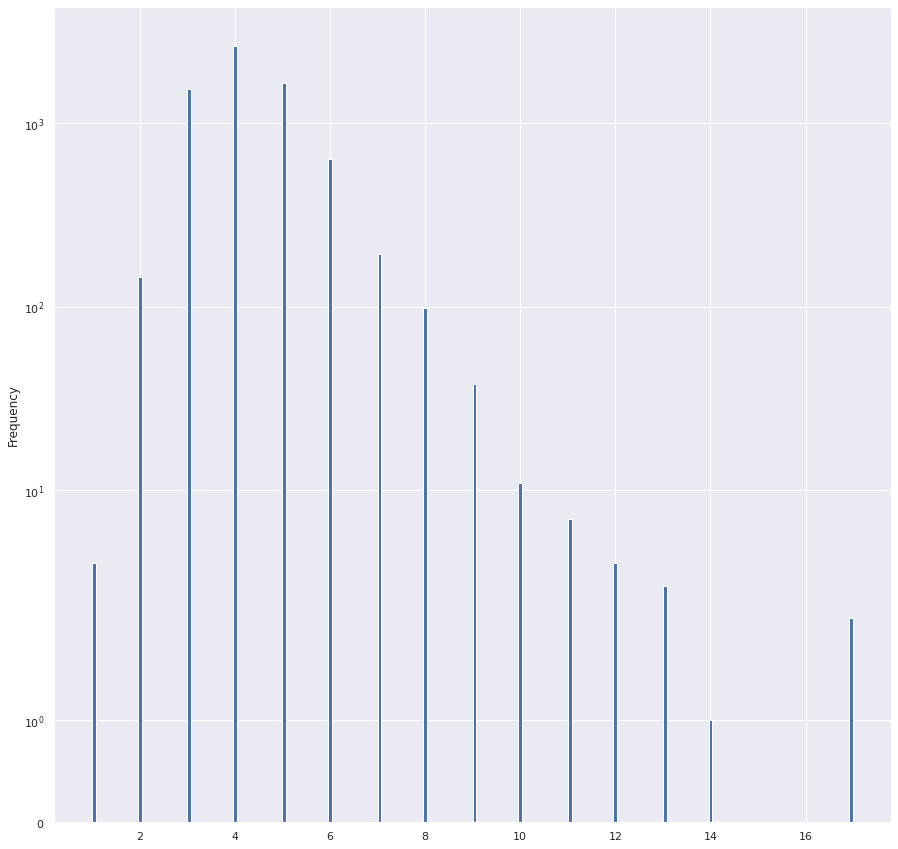

EEPD100_150


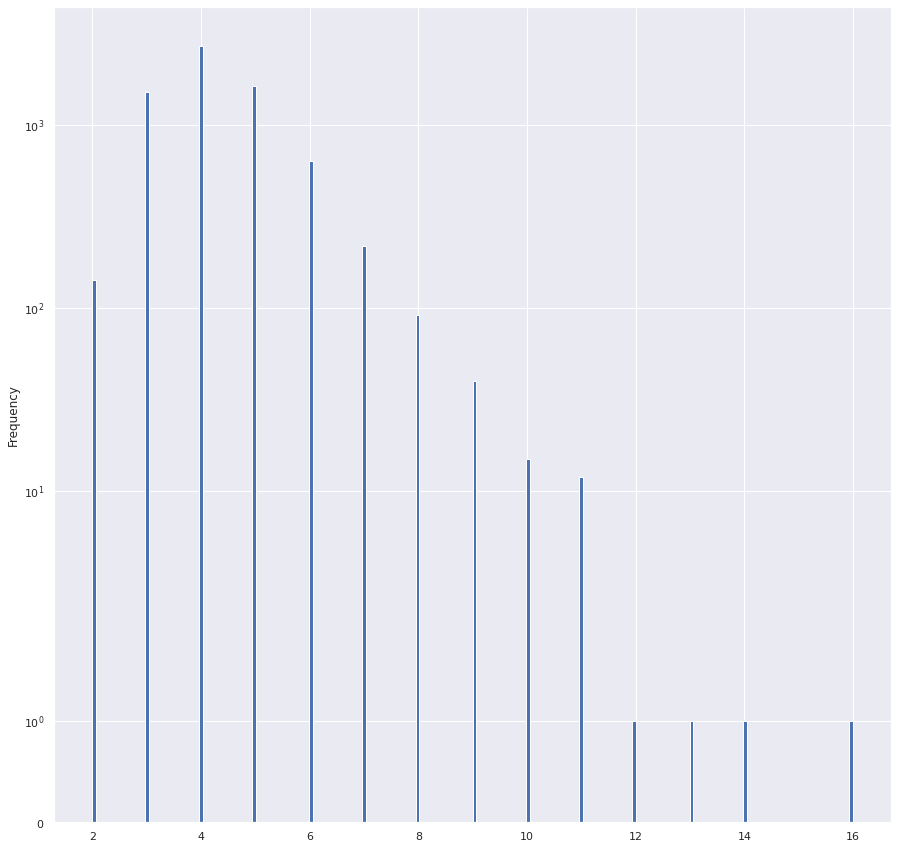

EEPD150_200


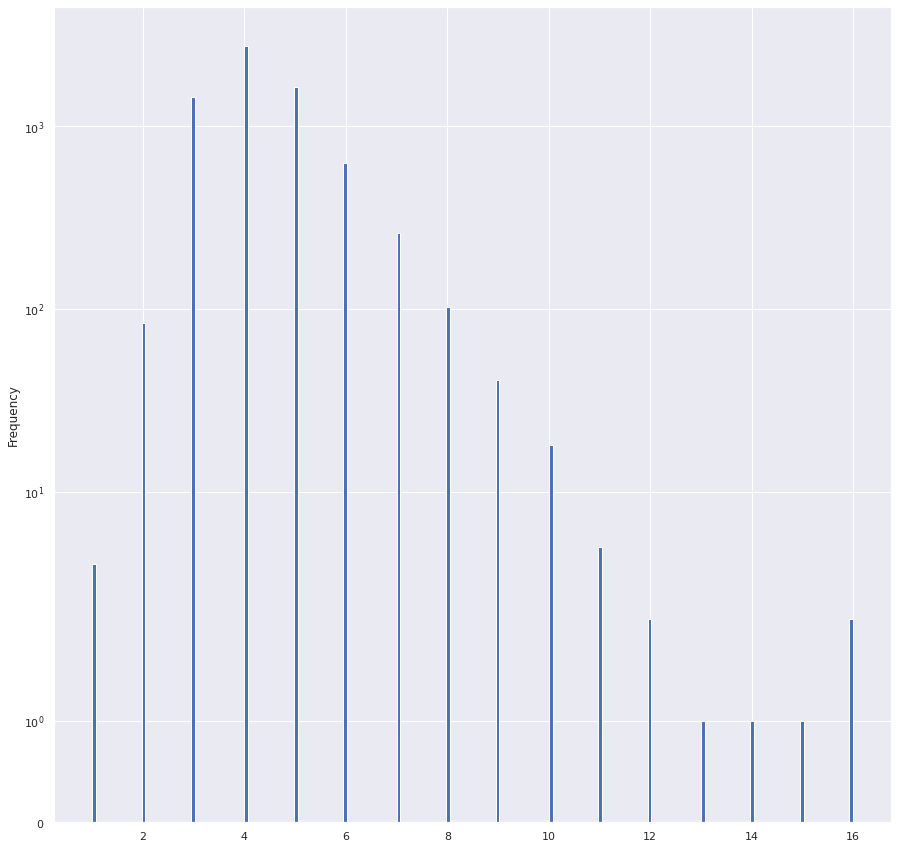

EEPD200_250


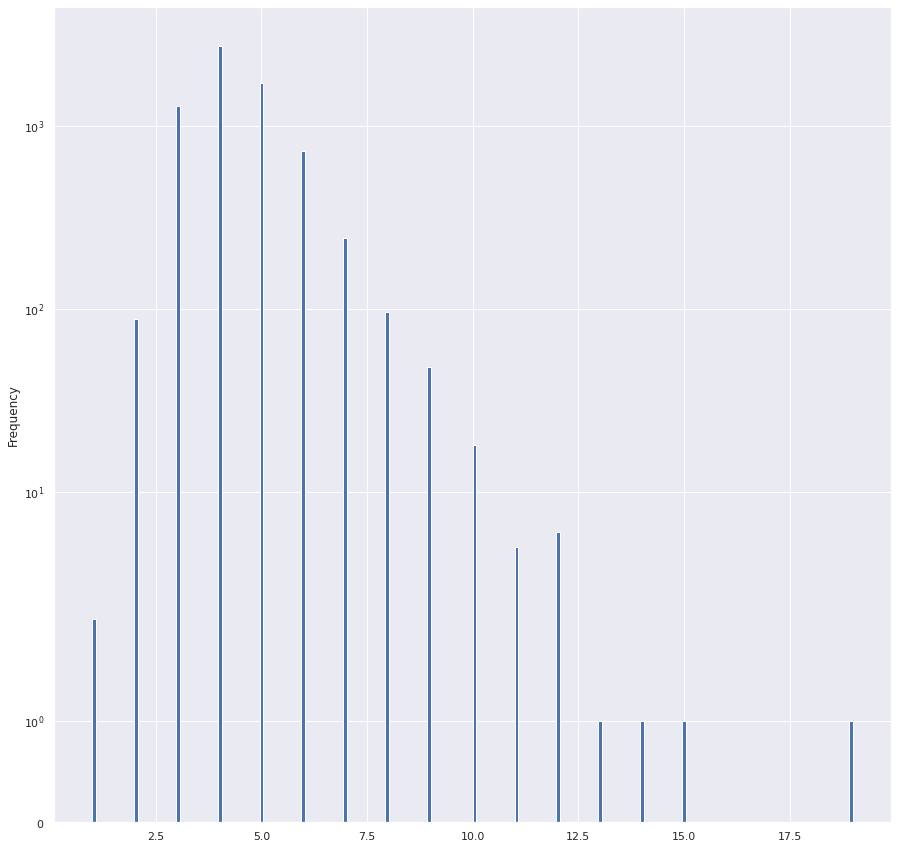

EEPD250_300


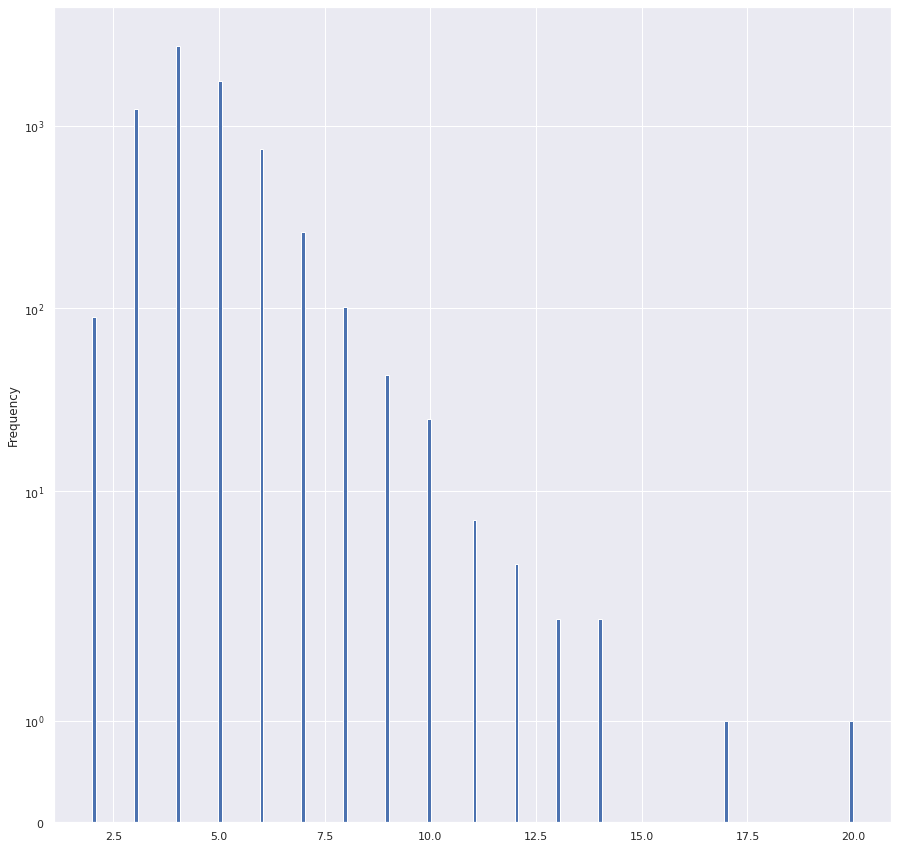

EEPD300_350


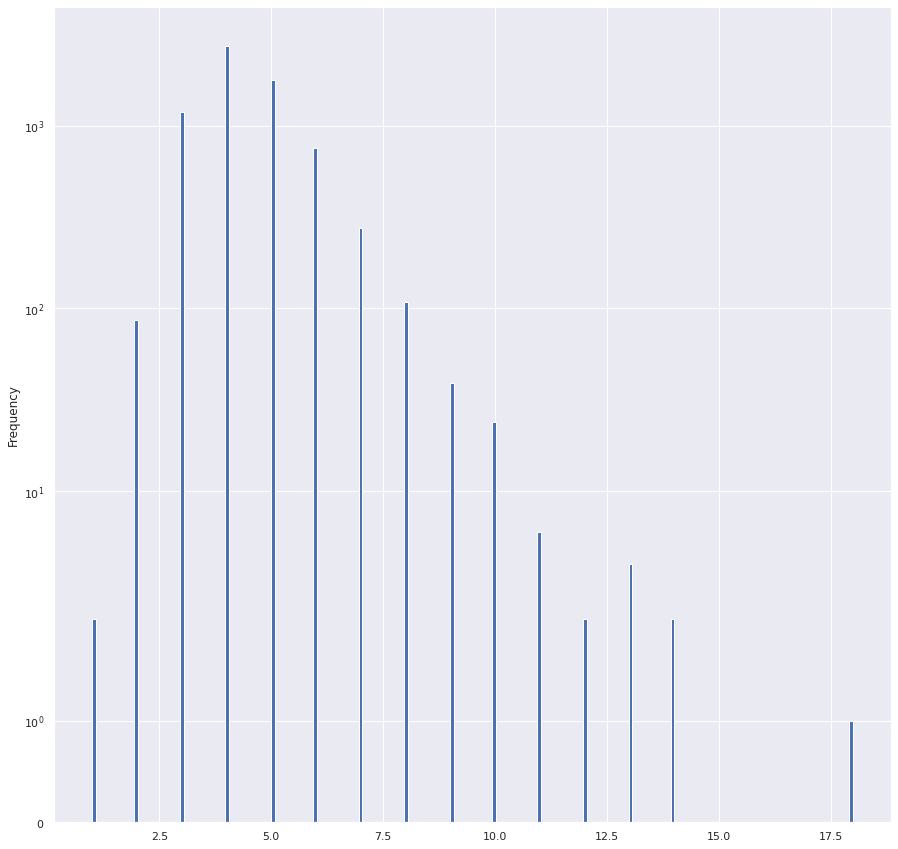

EEPD350_400


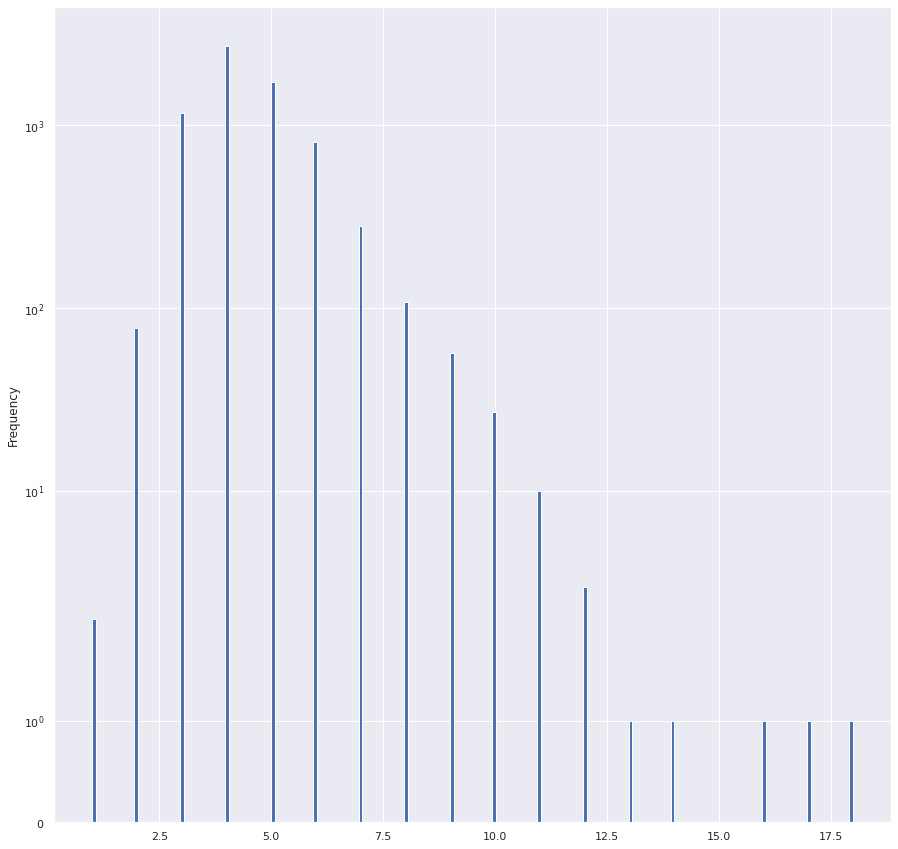

EEPD400_450


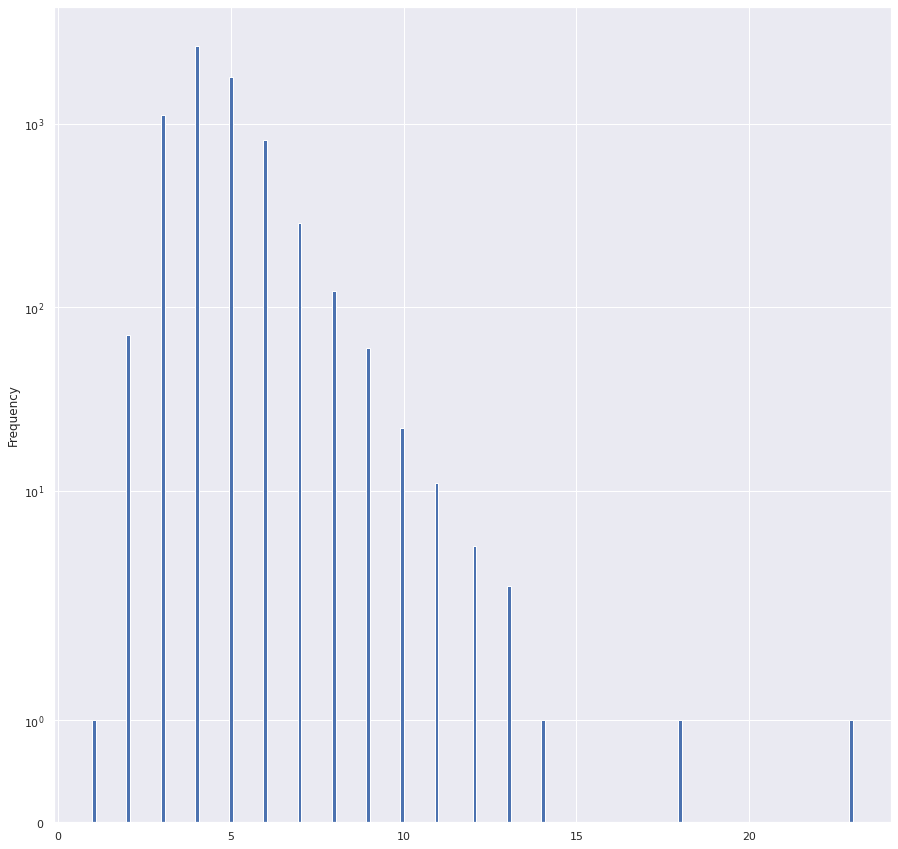

EEPD450_500


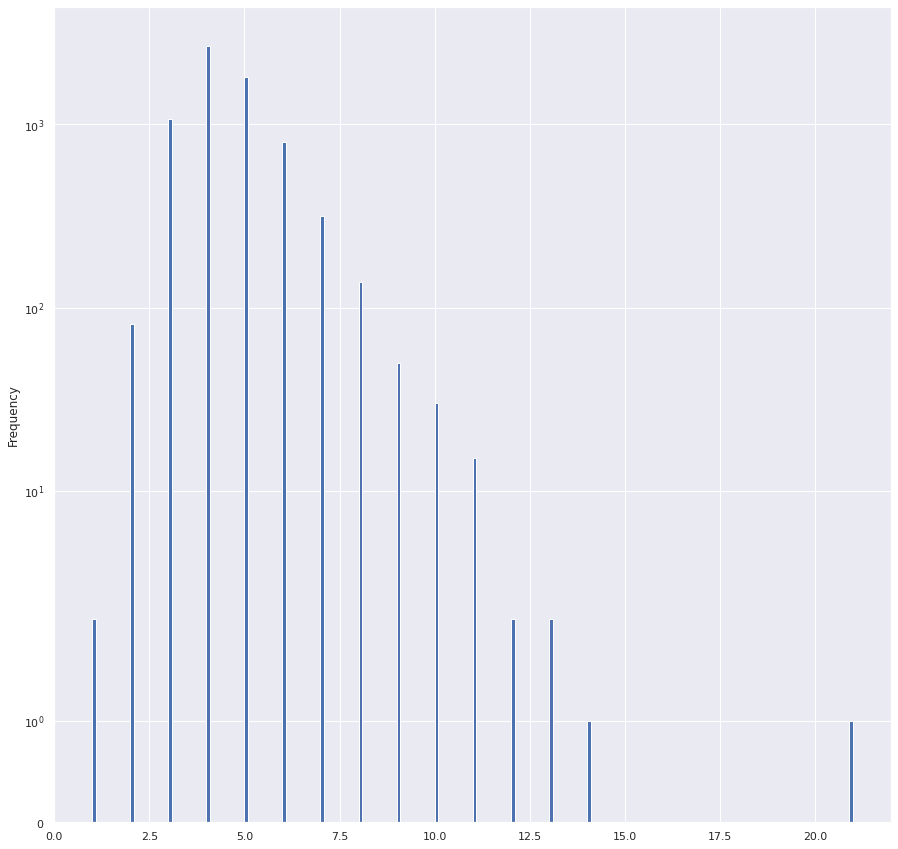

EEPD500_550


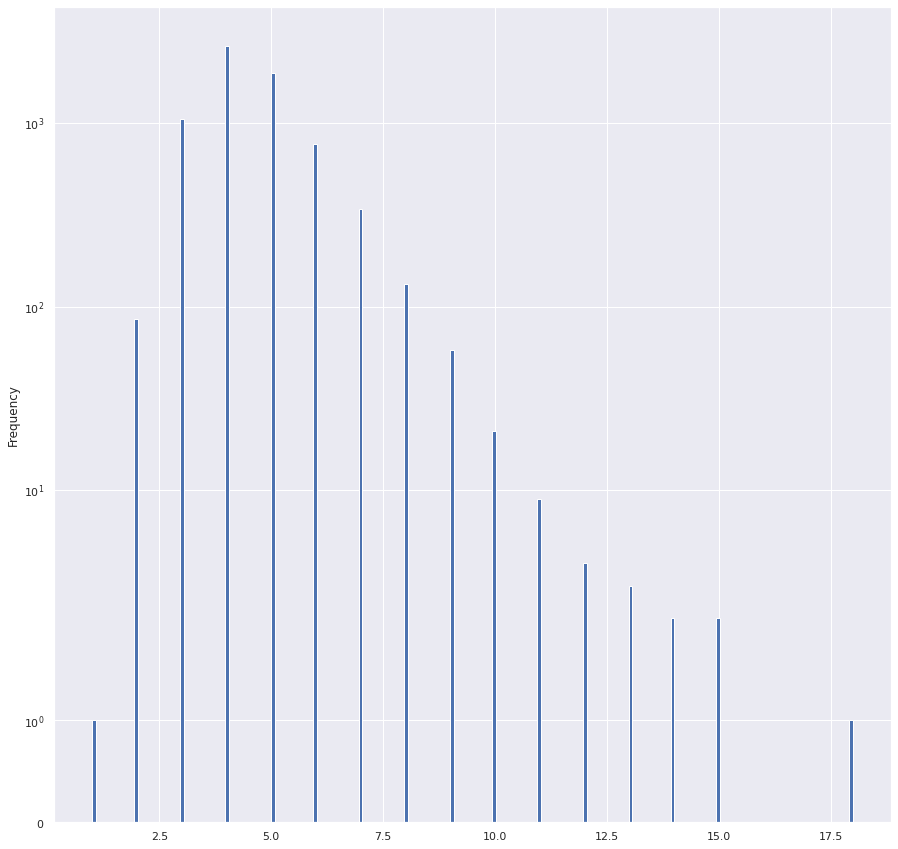

EEPD550_600


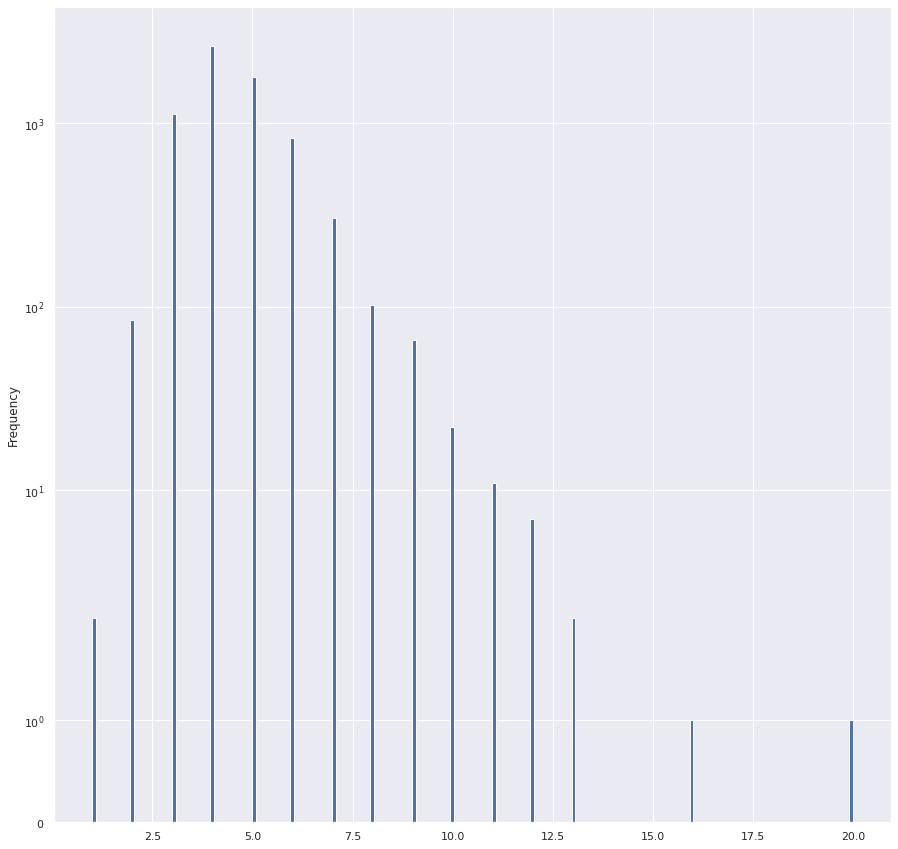

EEPD600_650


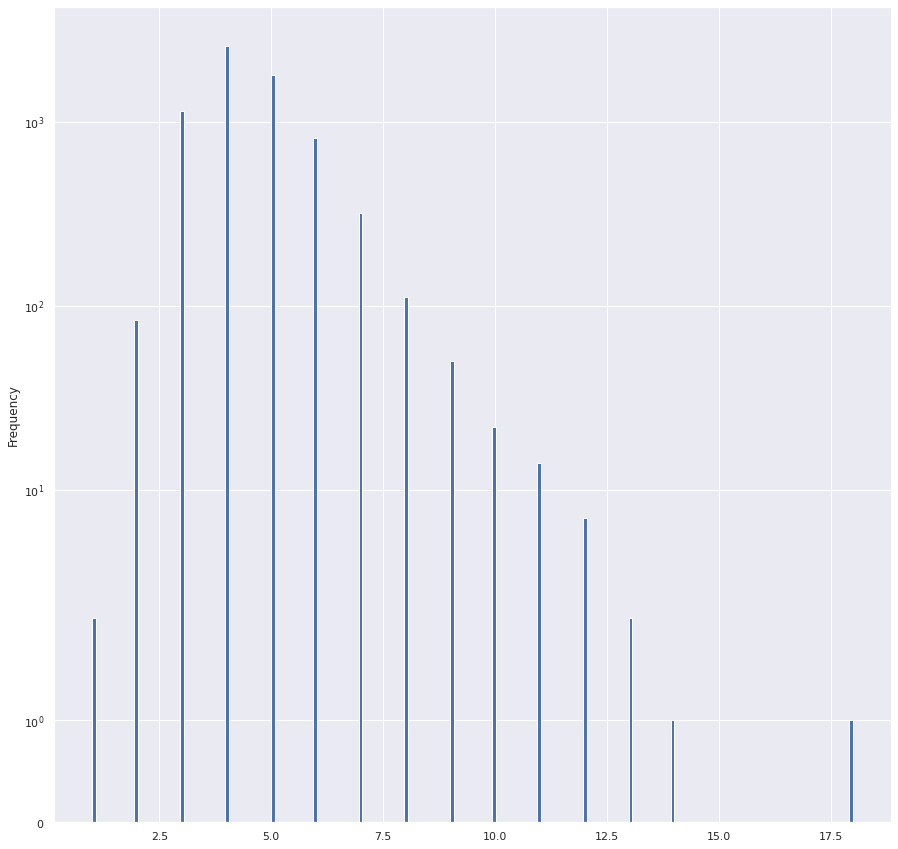

EEPD650_700


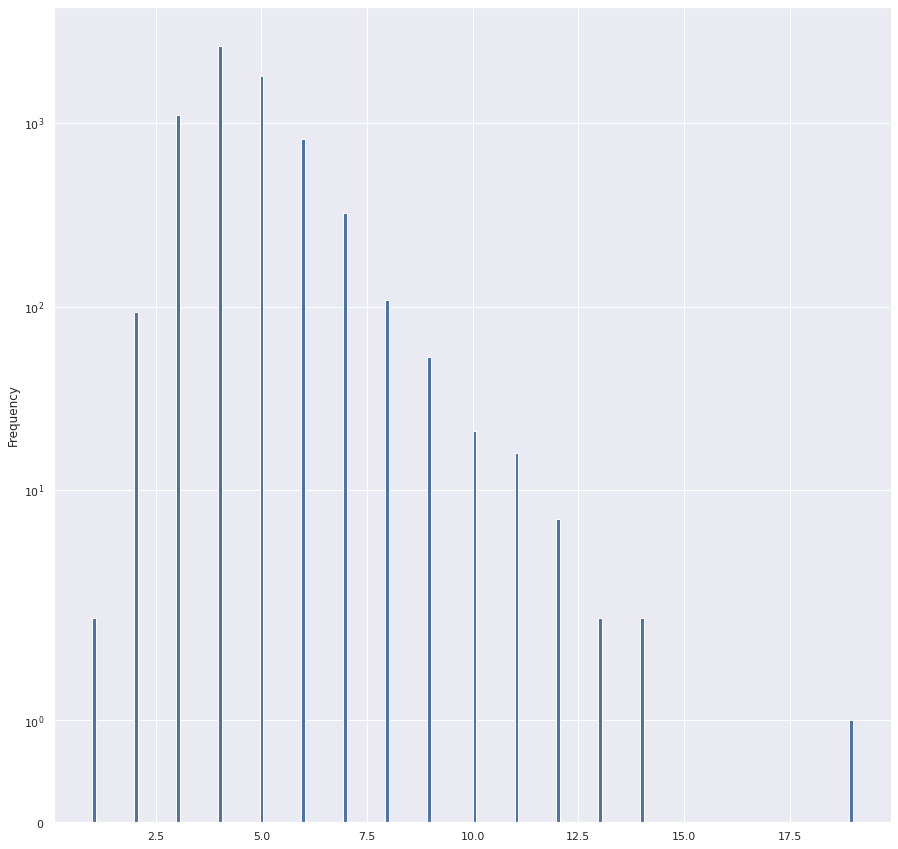

EEPD700_750


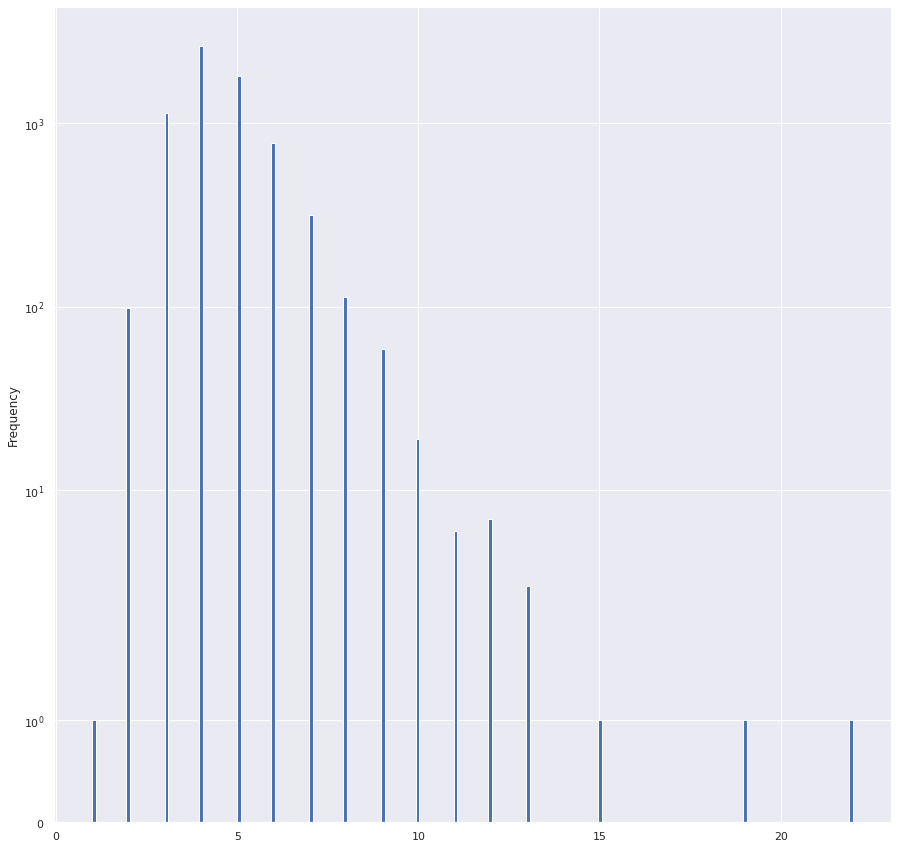

EEPD750_800


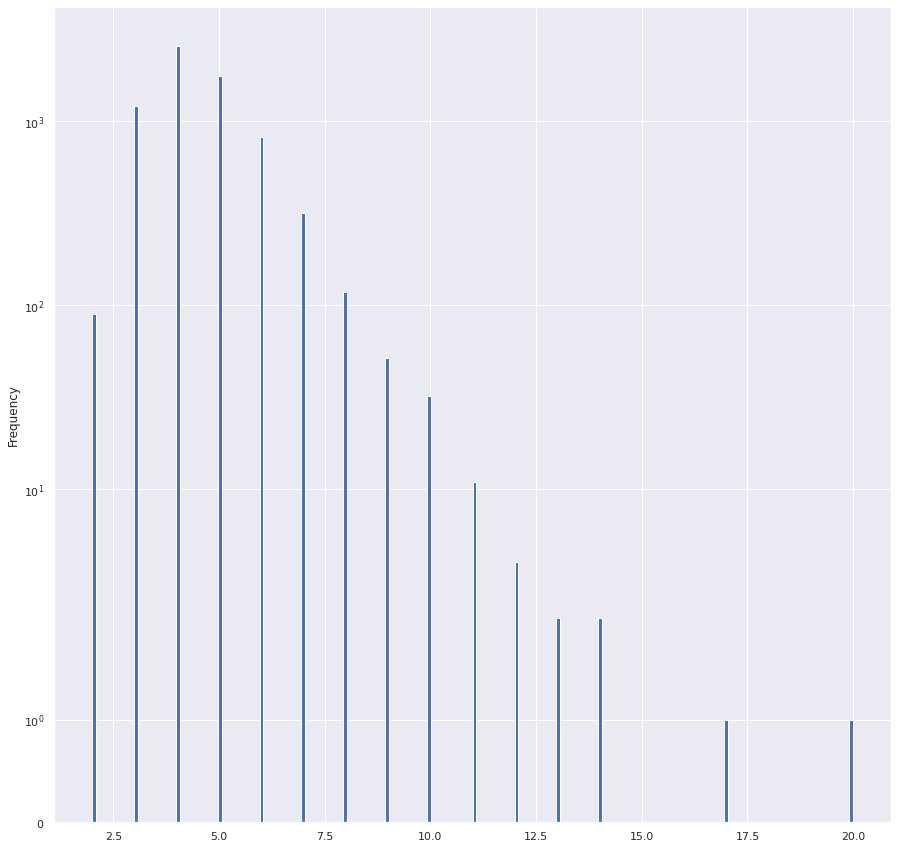

EEPD800_850


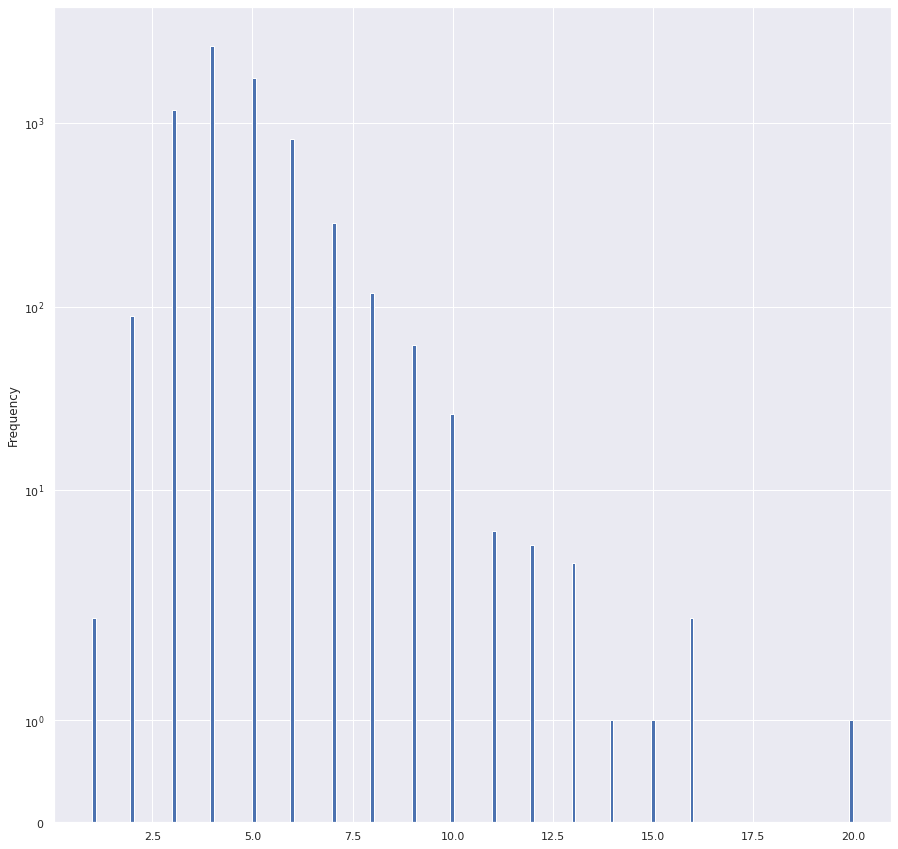

EEPD850_900


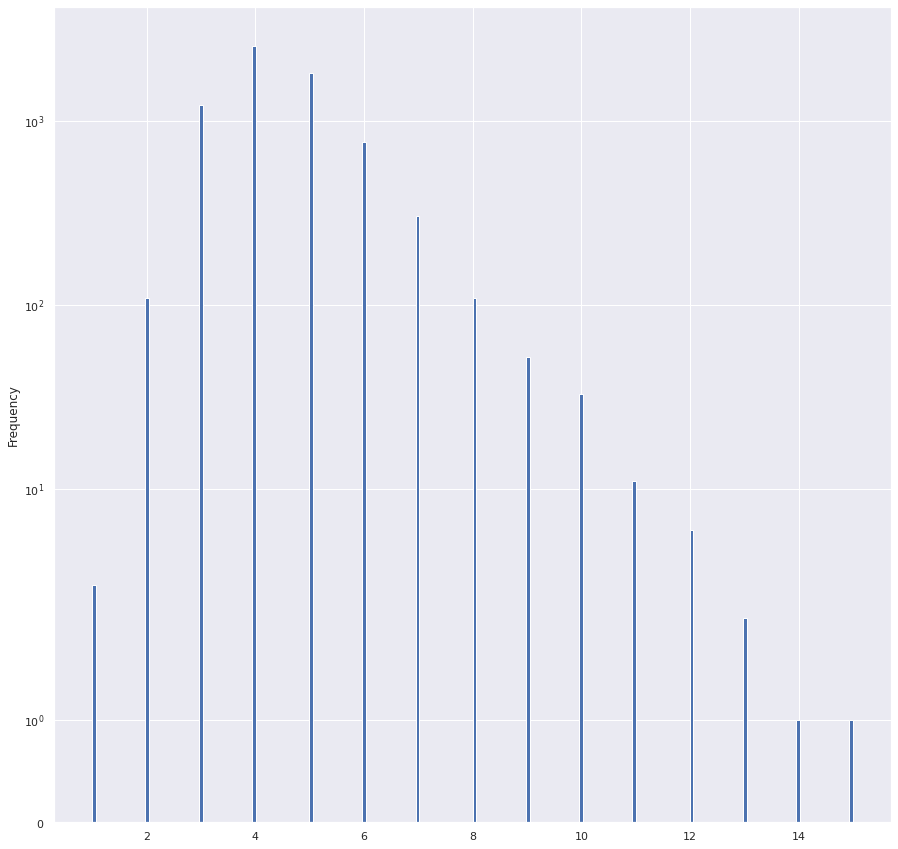

EEPD900_950


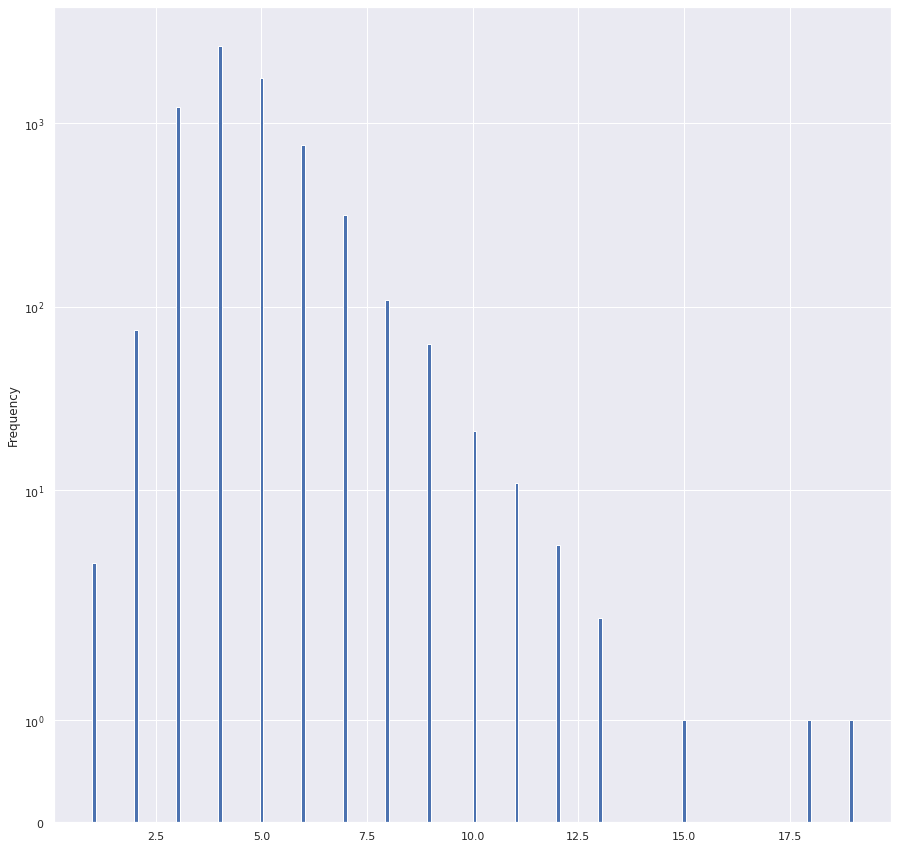

EEPD950_1000


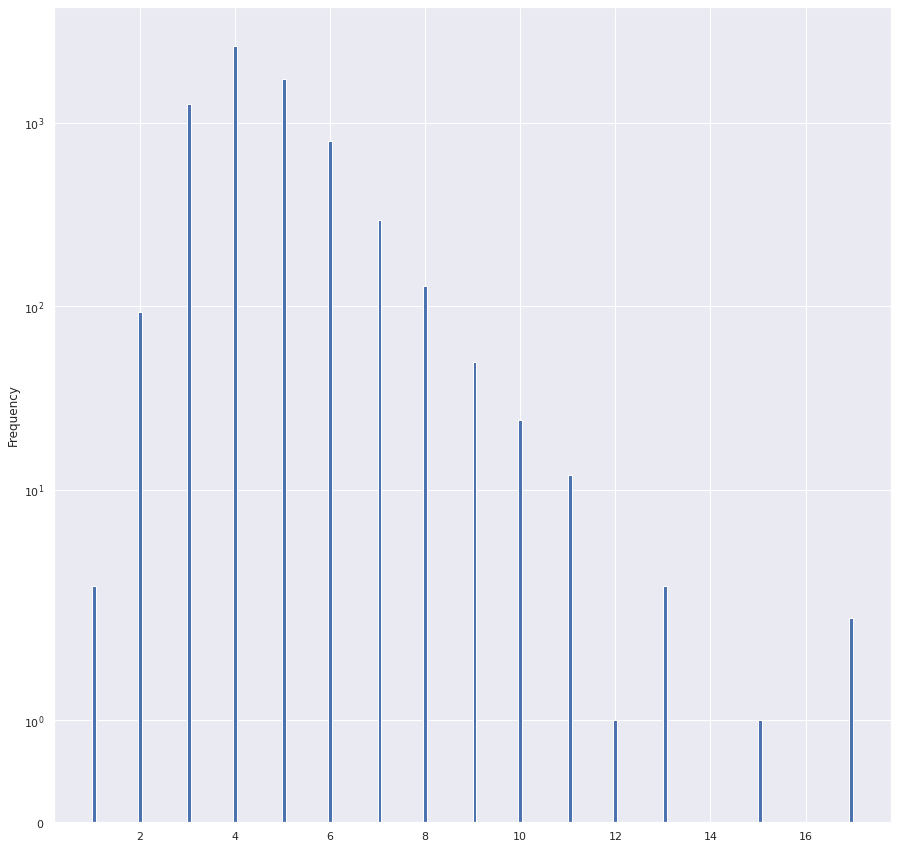

Zero_Crossing_Rate


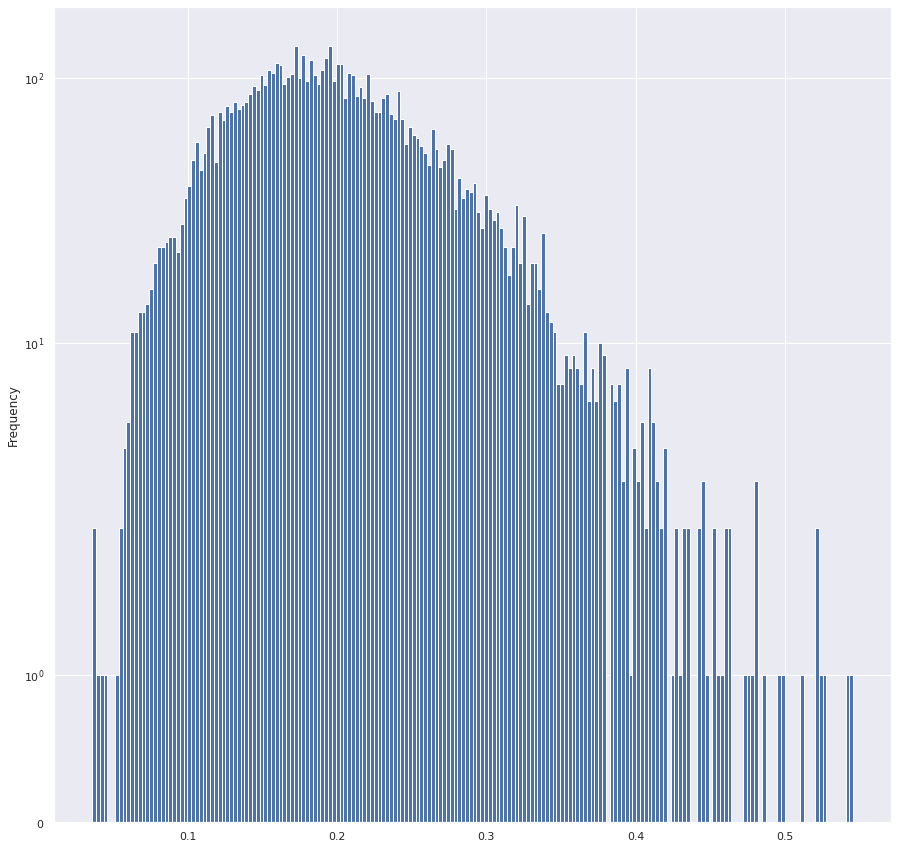

RMS_Power


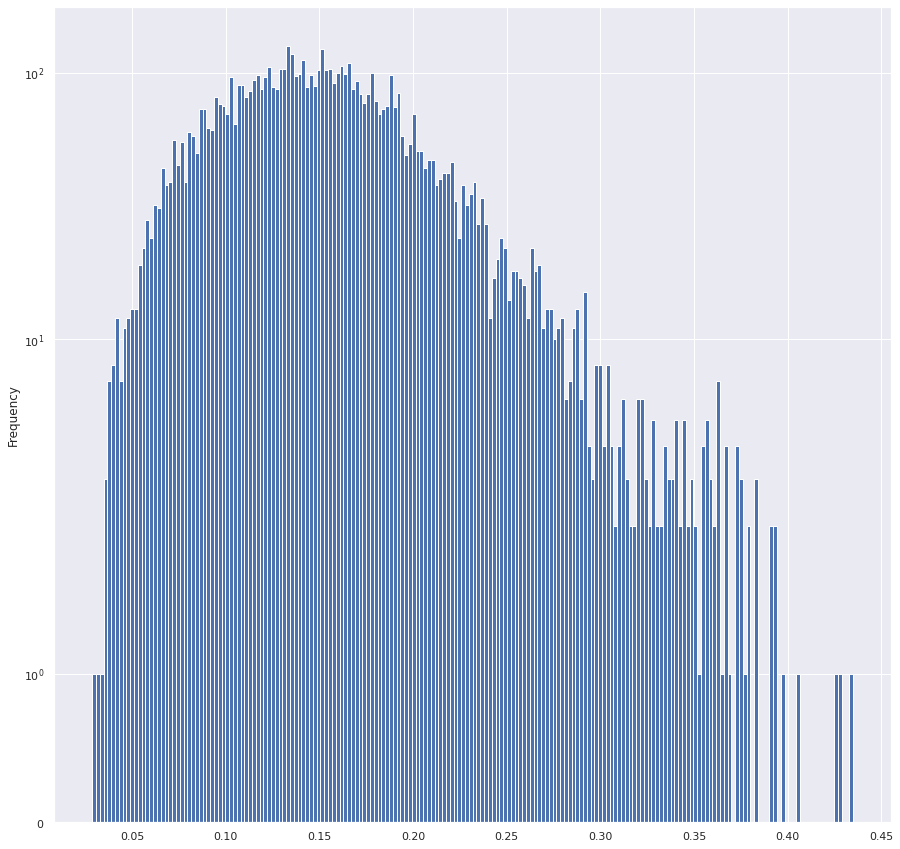

Dominant_Freq


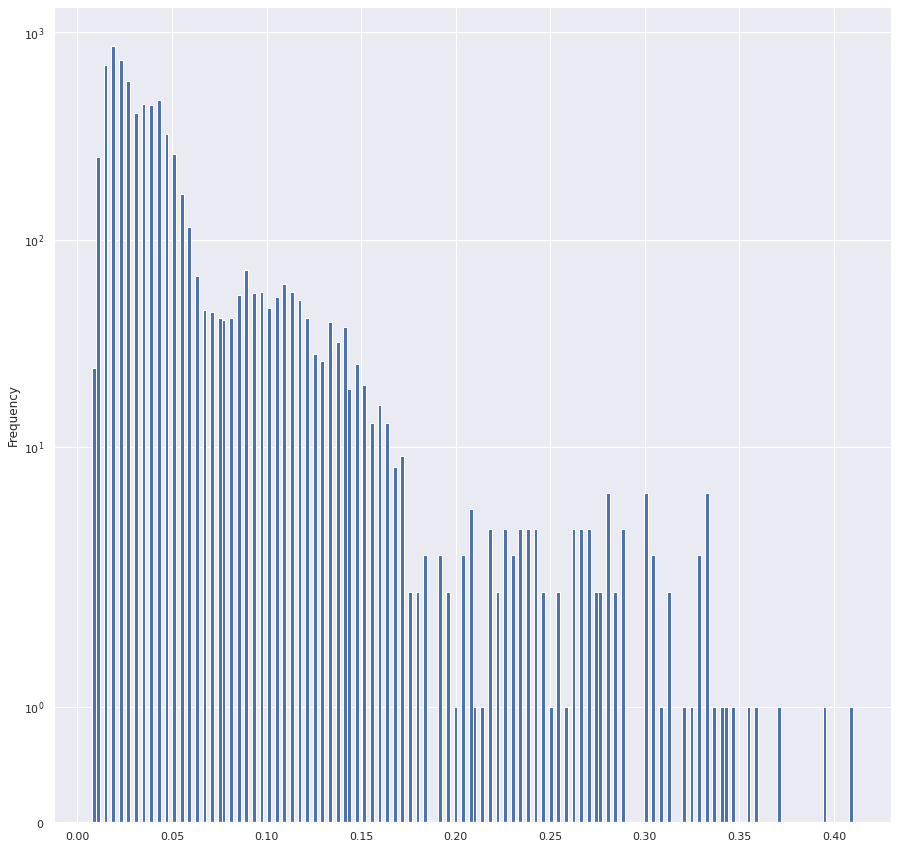

Spectral_Centroid


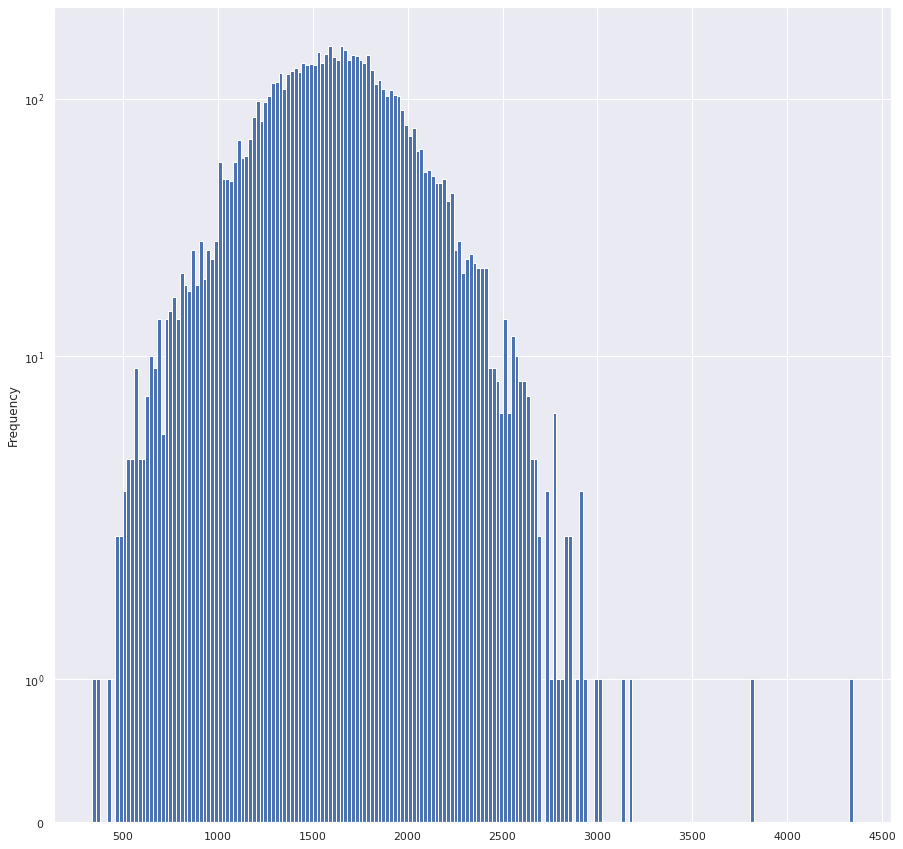

Spectral_Rolloff


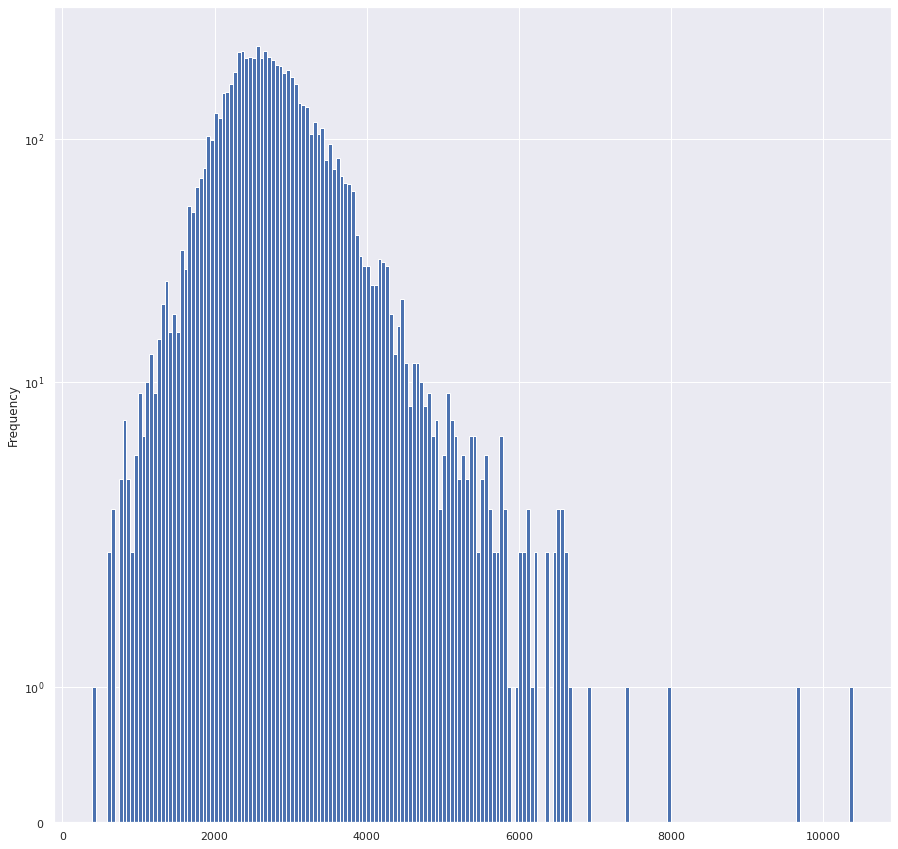

Spectral_Spread


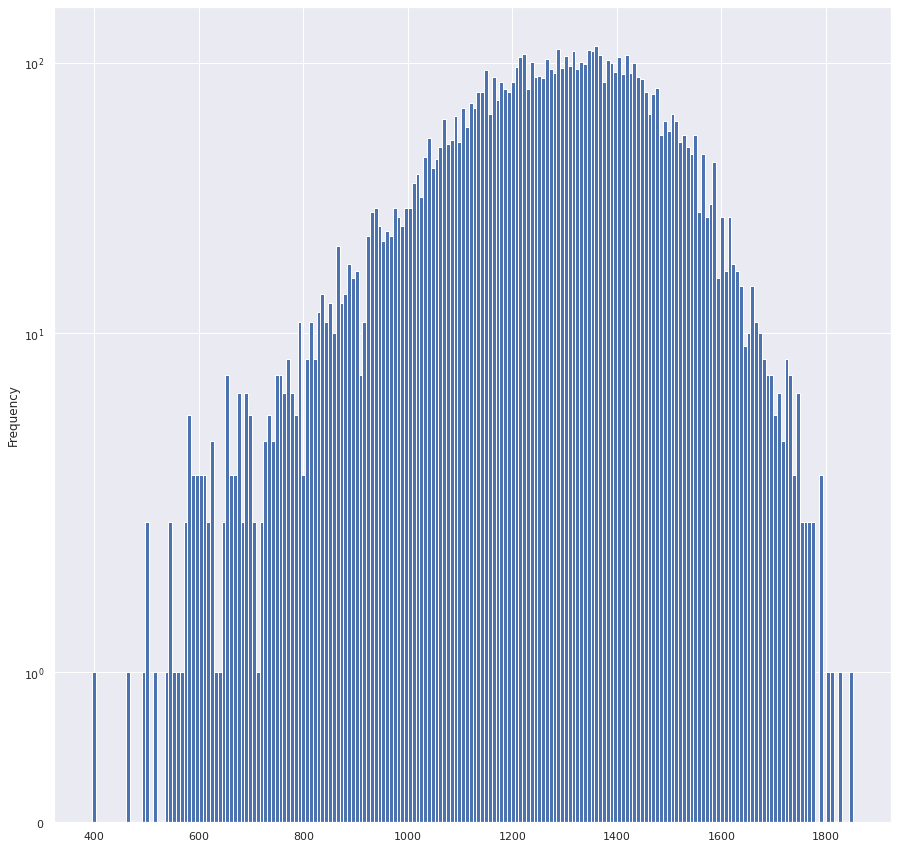

Spectral_Skewness


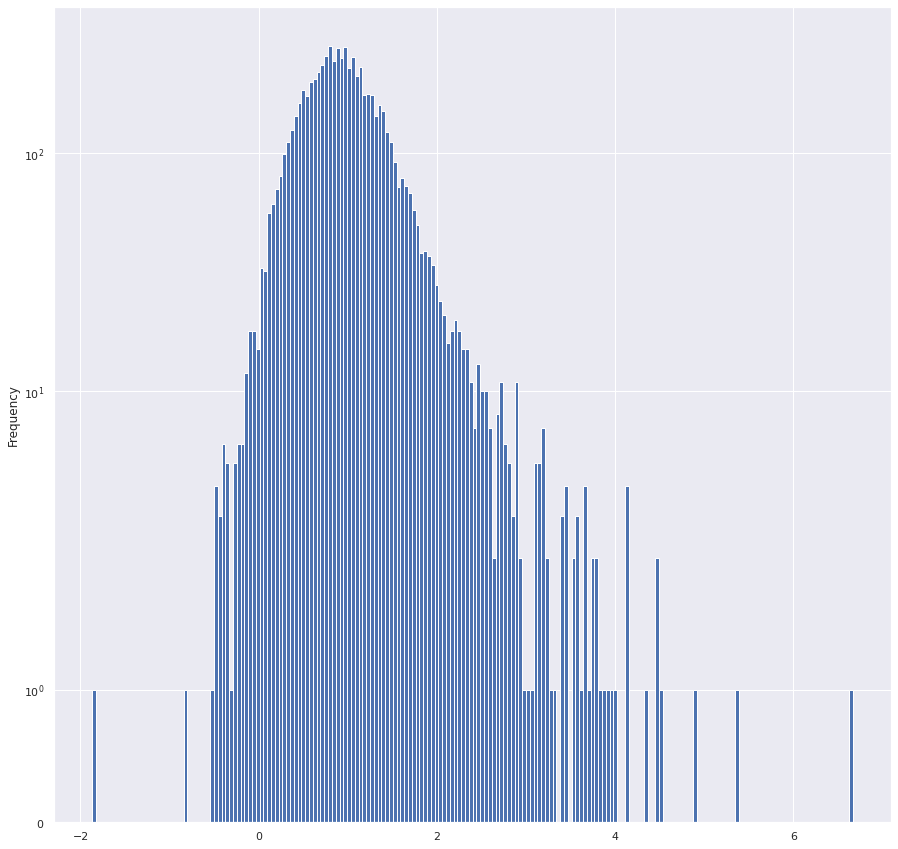

Spectral_Kurtosis


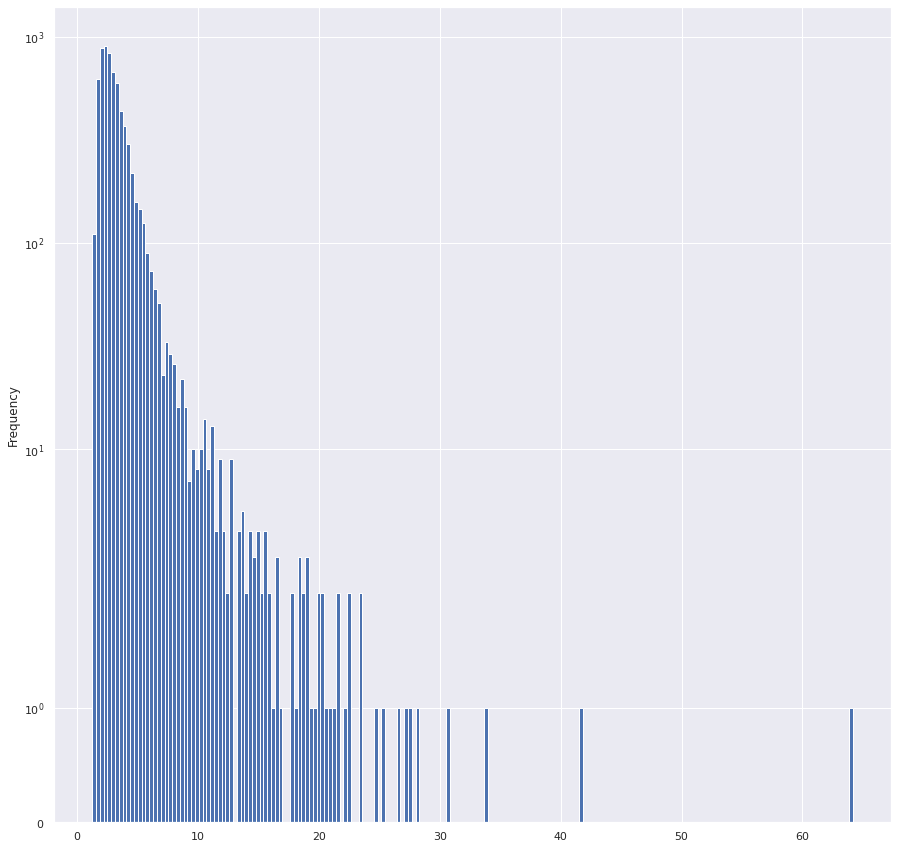

Spectral_Bandwidth


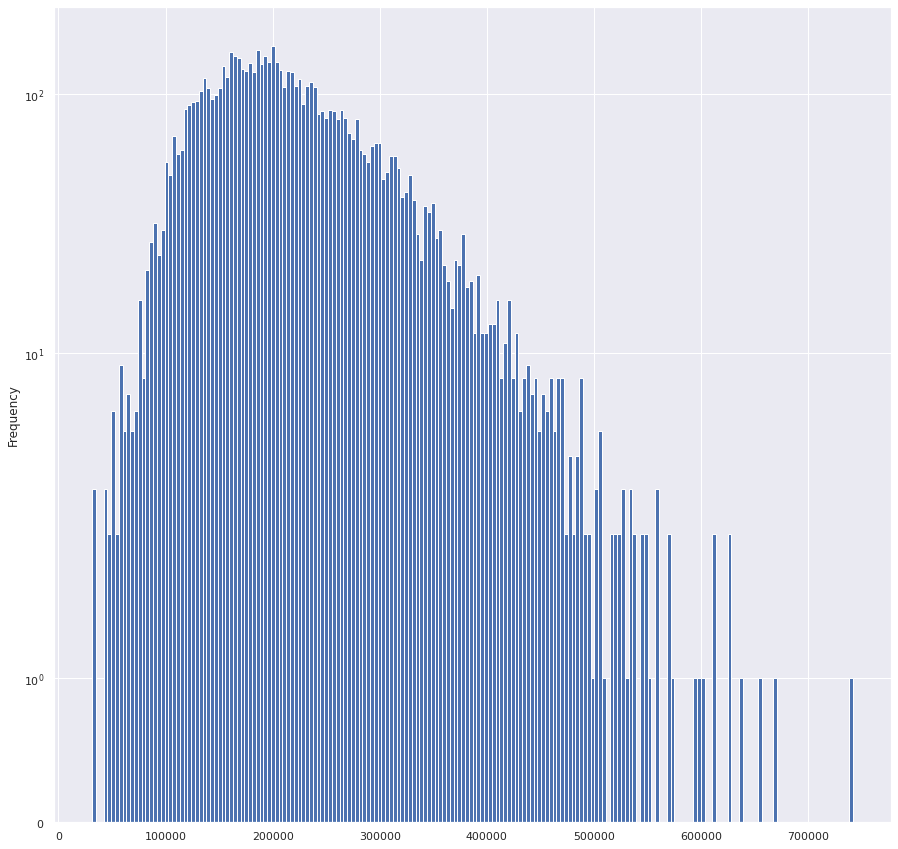

Spectral_Flatness


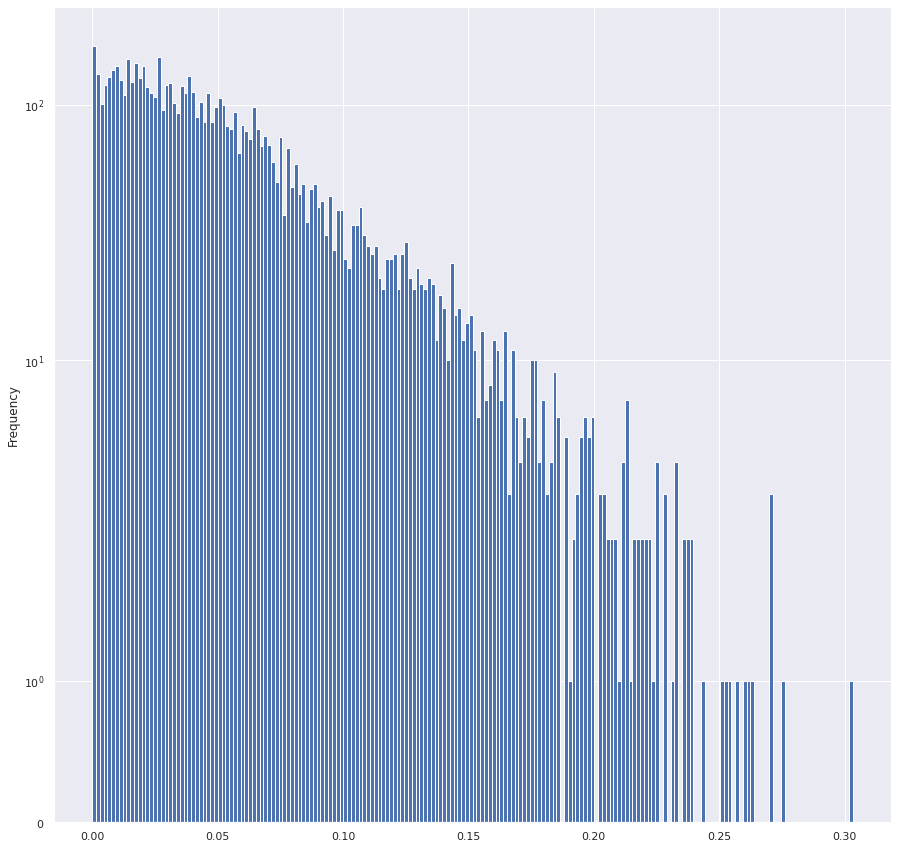

Spectral_StDev


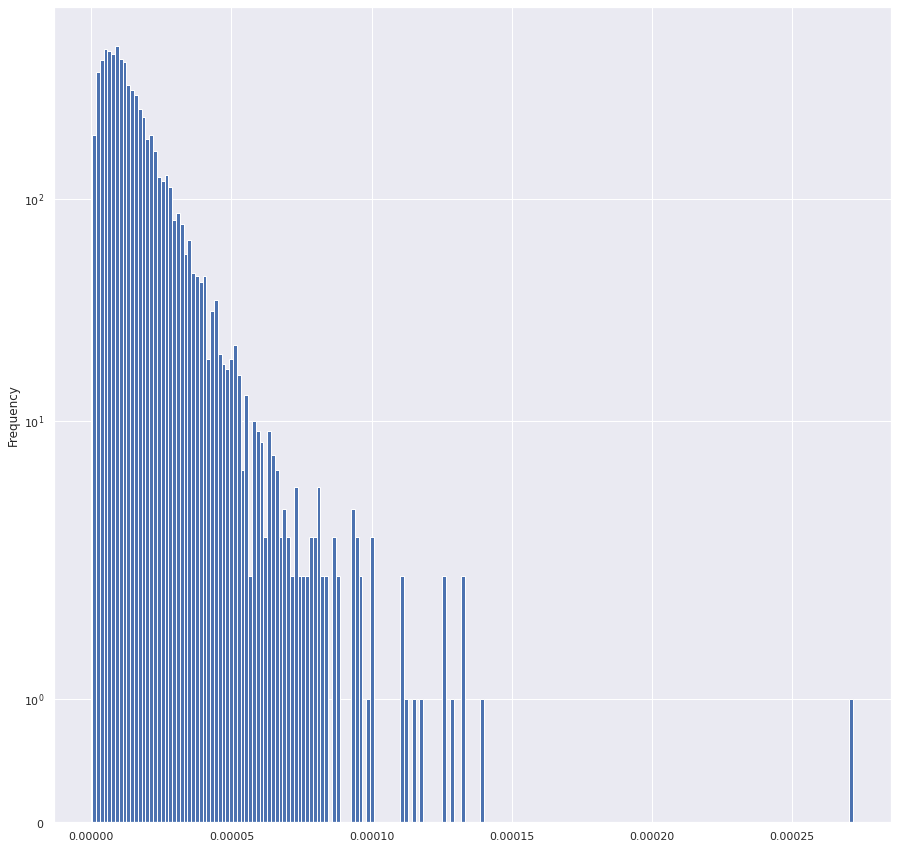

Spectral_Slope


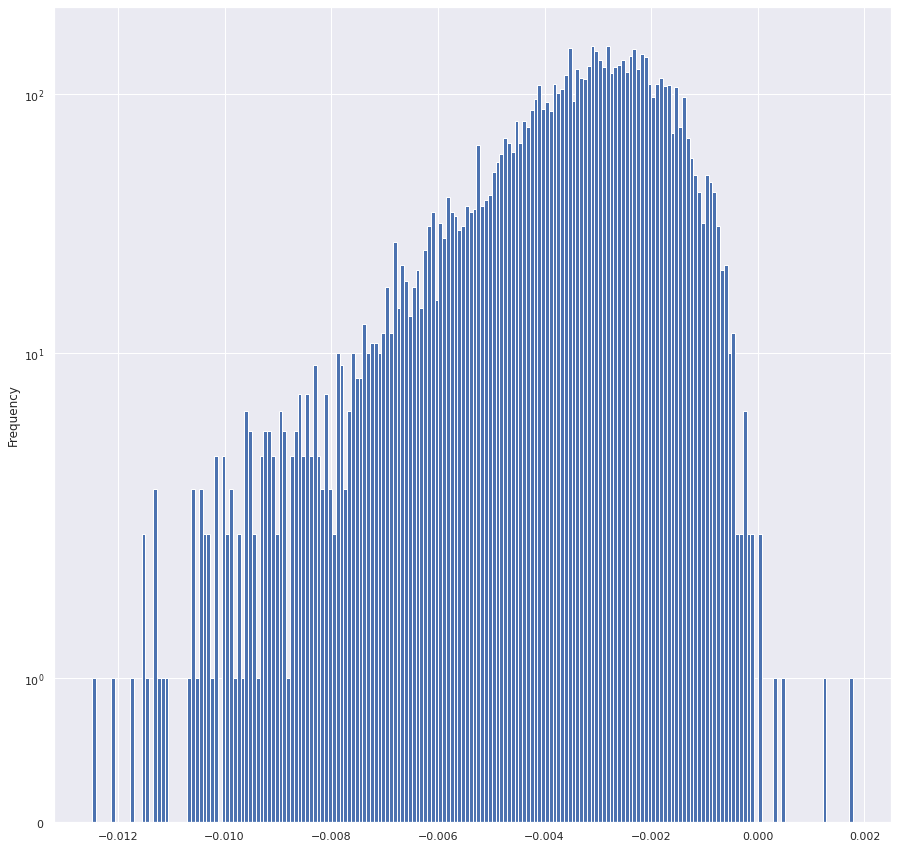

Spectral_Decrease


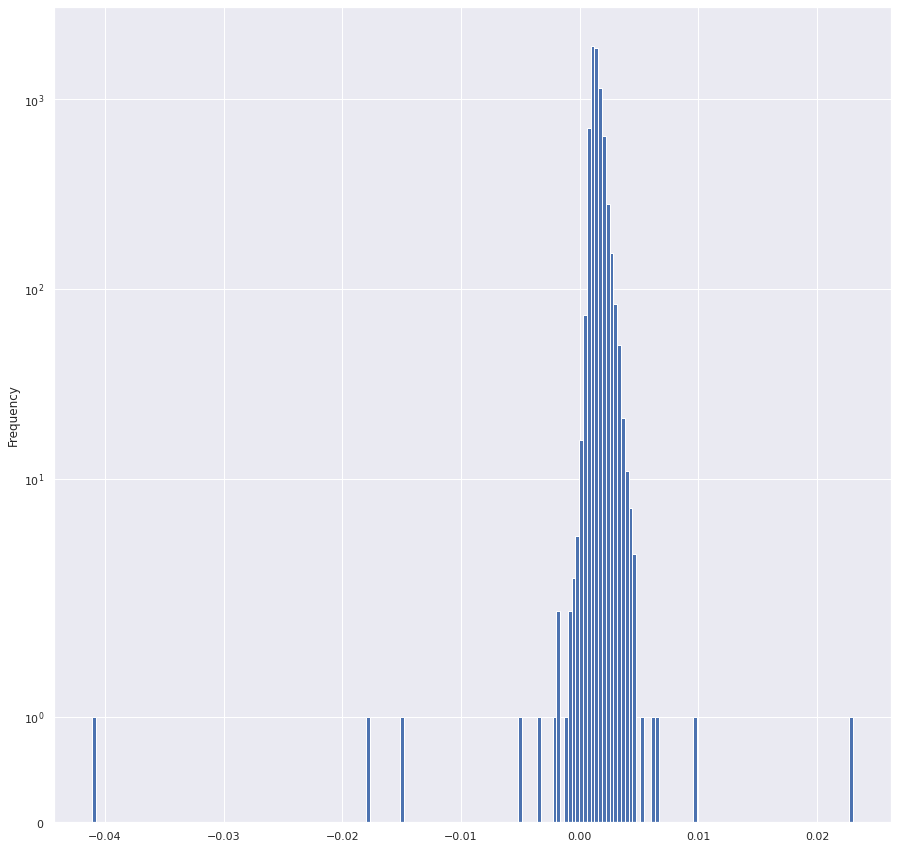

MFCC_mean0


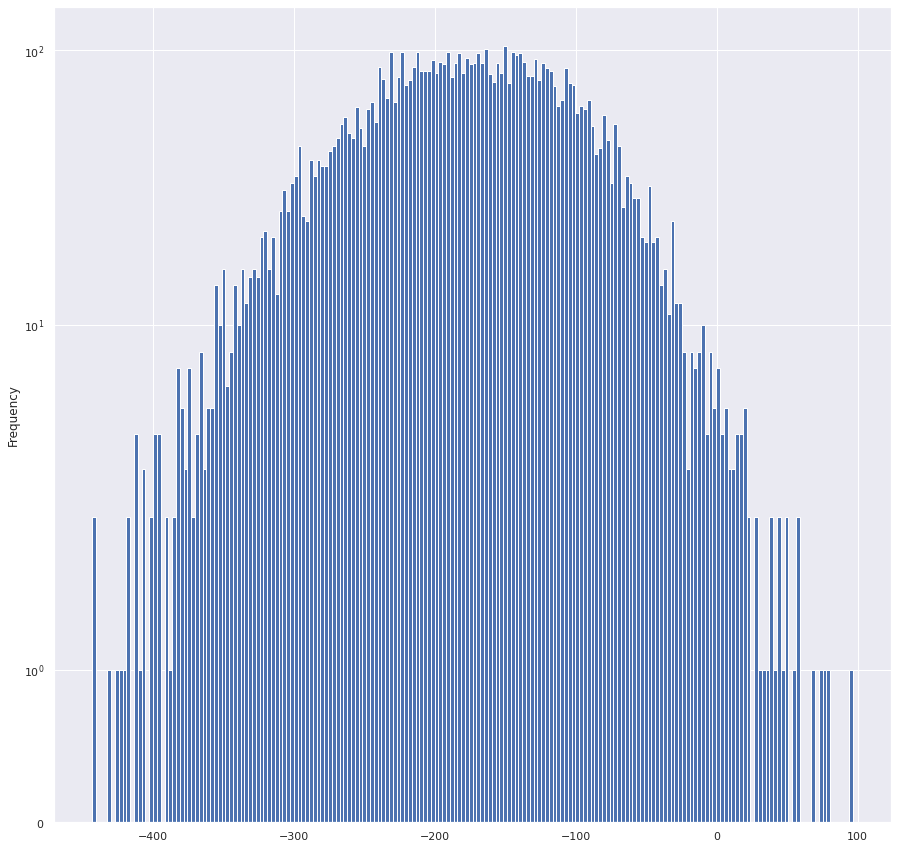

MFCC_mean1


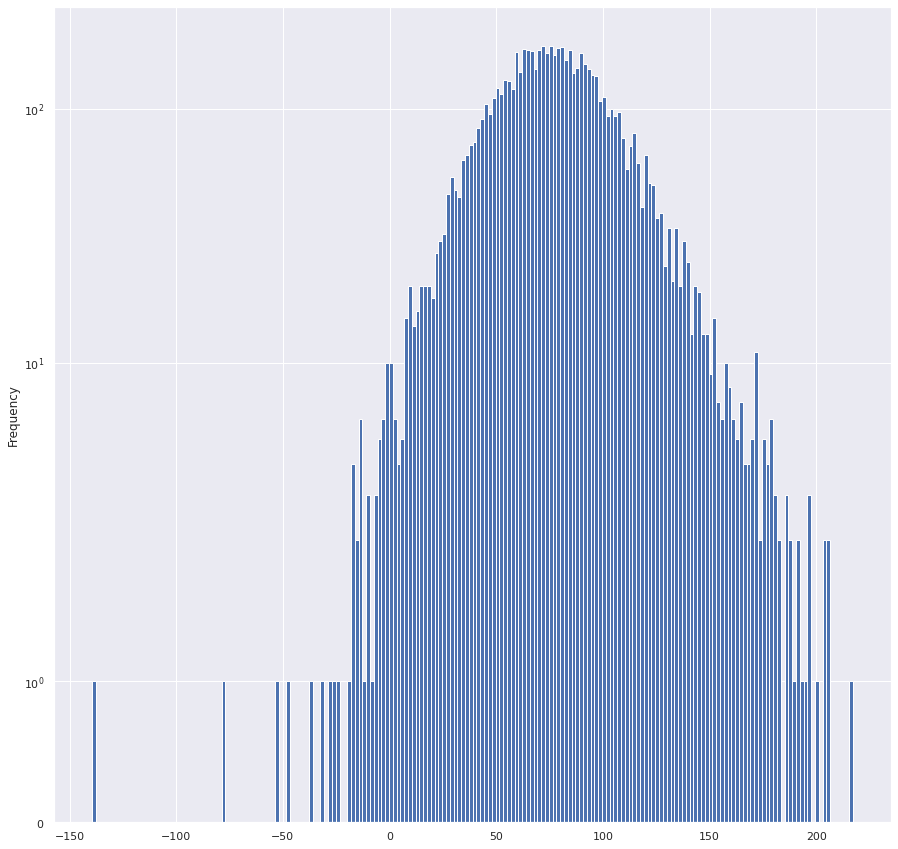

MFCC_mean2


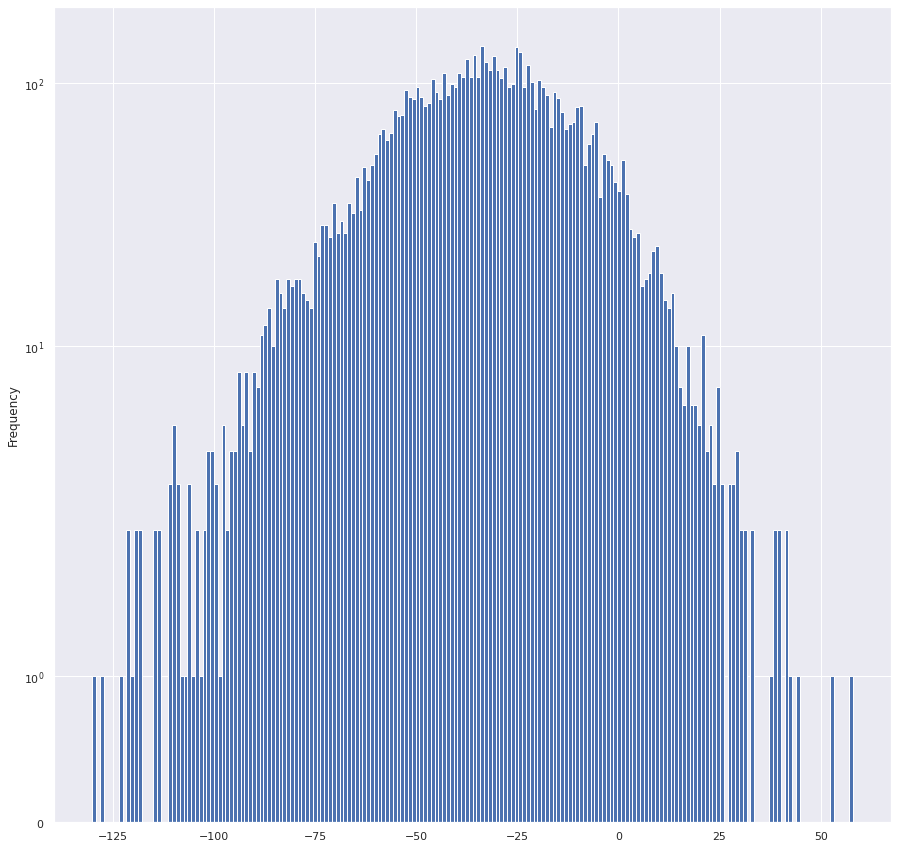

MFCC_mean3


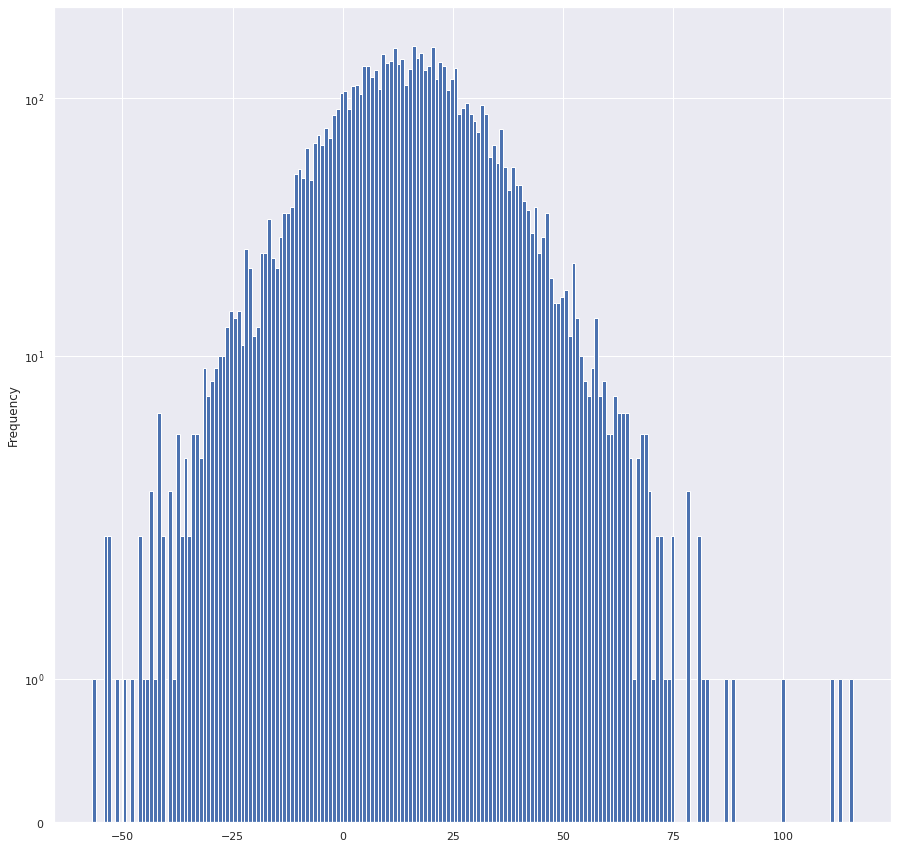

MFCC_mean4


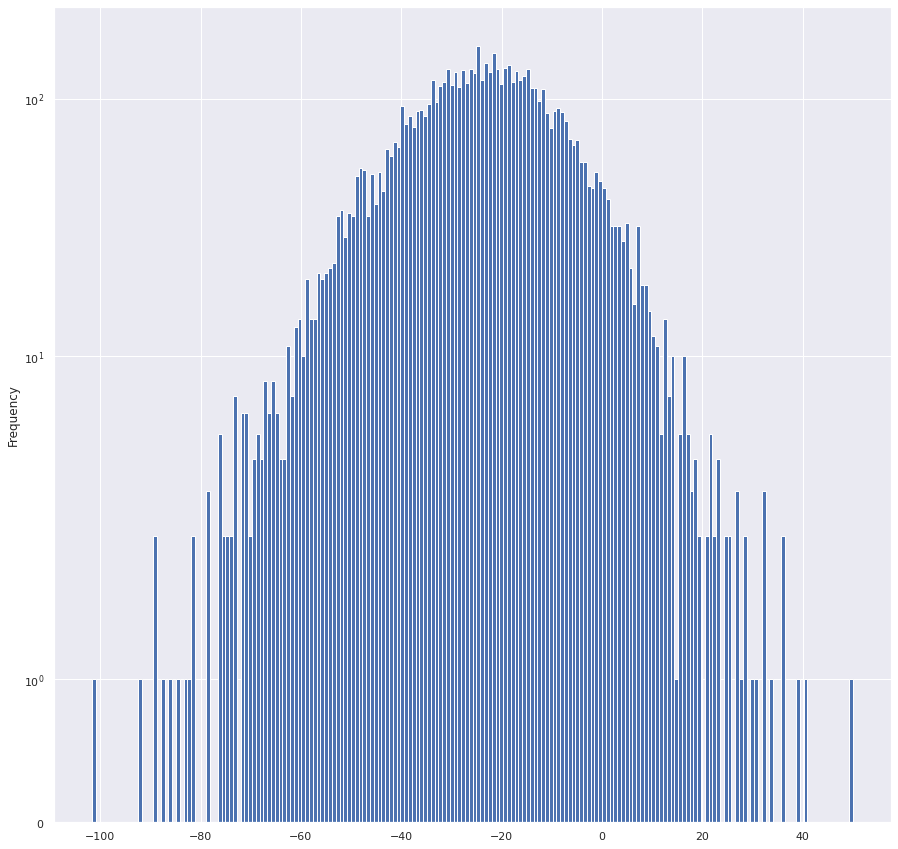

MFCC_mean5


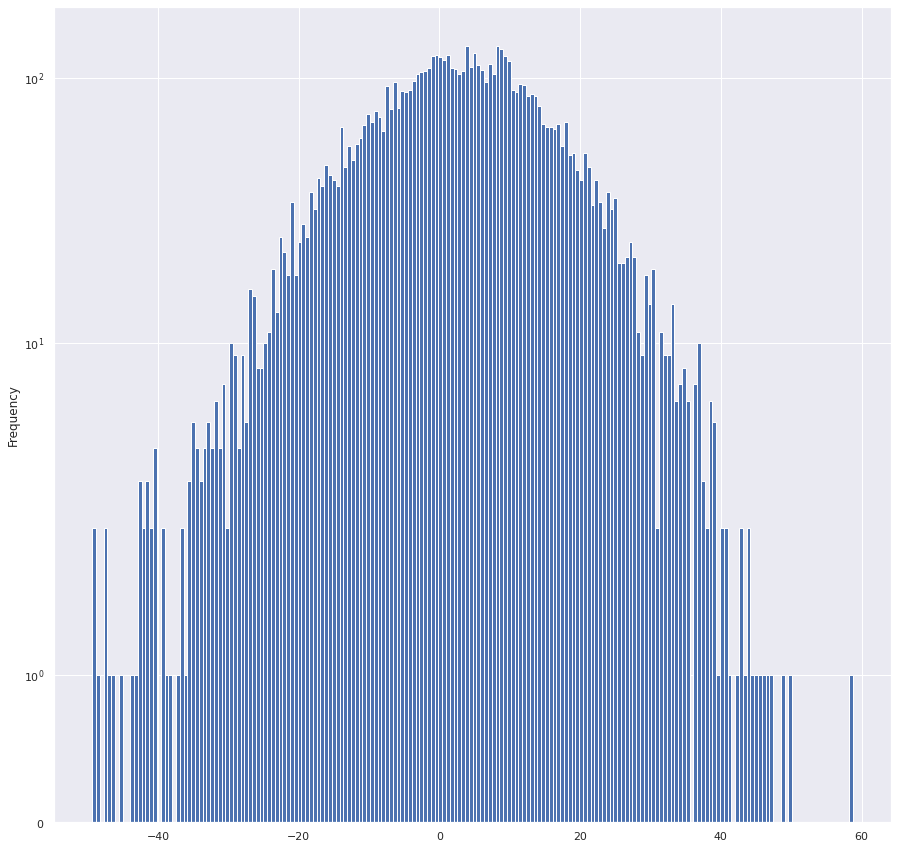

MFCC_mean6


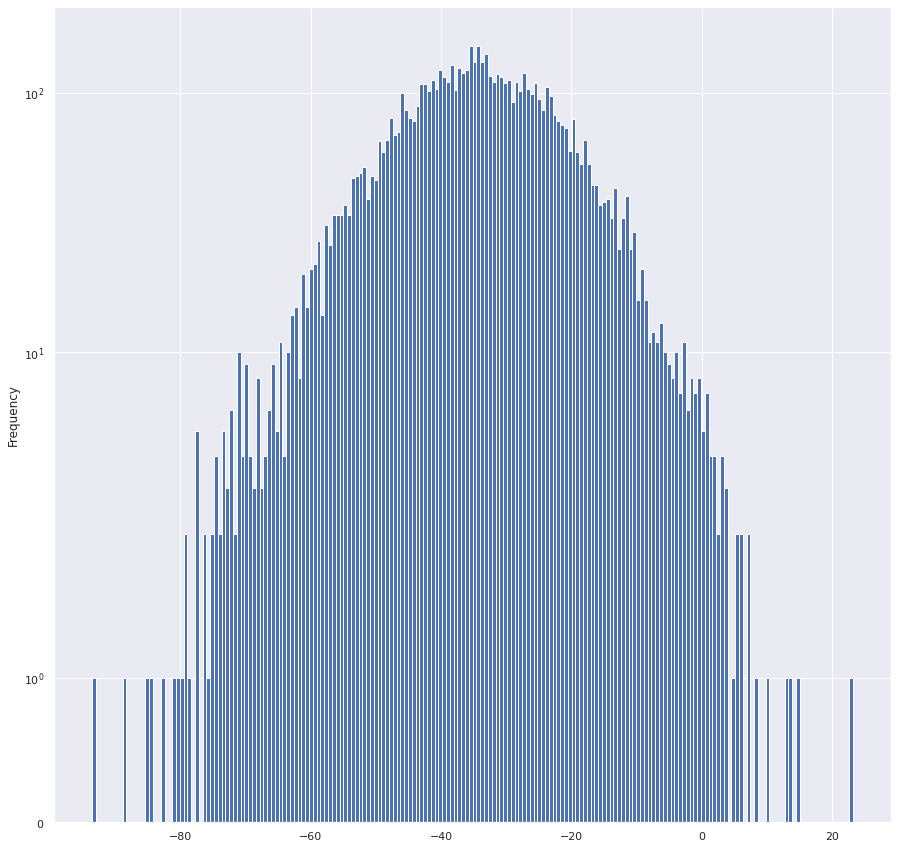

MFCC_mean7


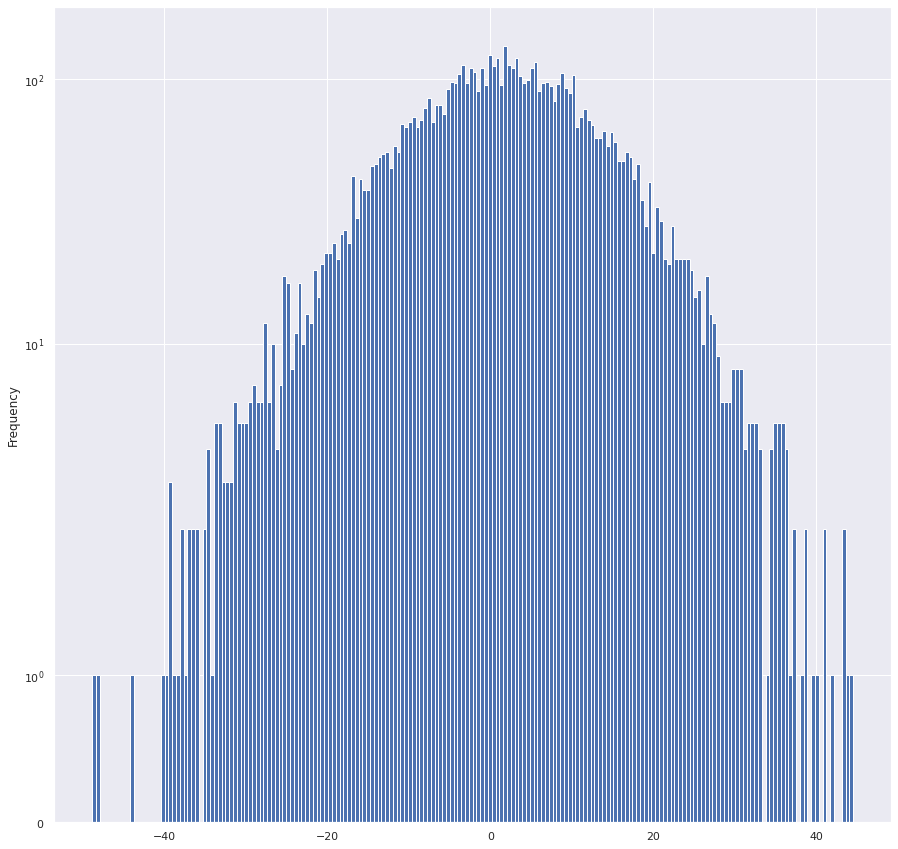

MFCC_mean8


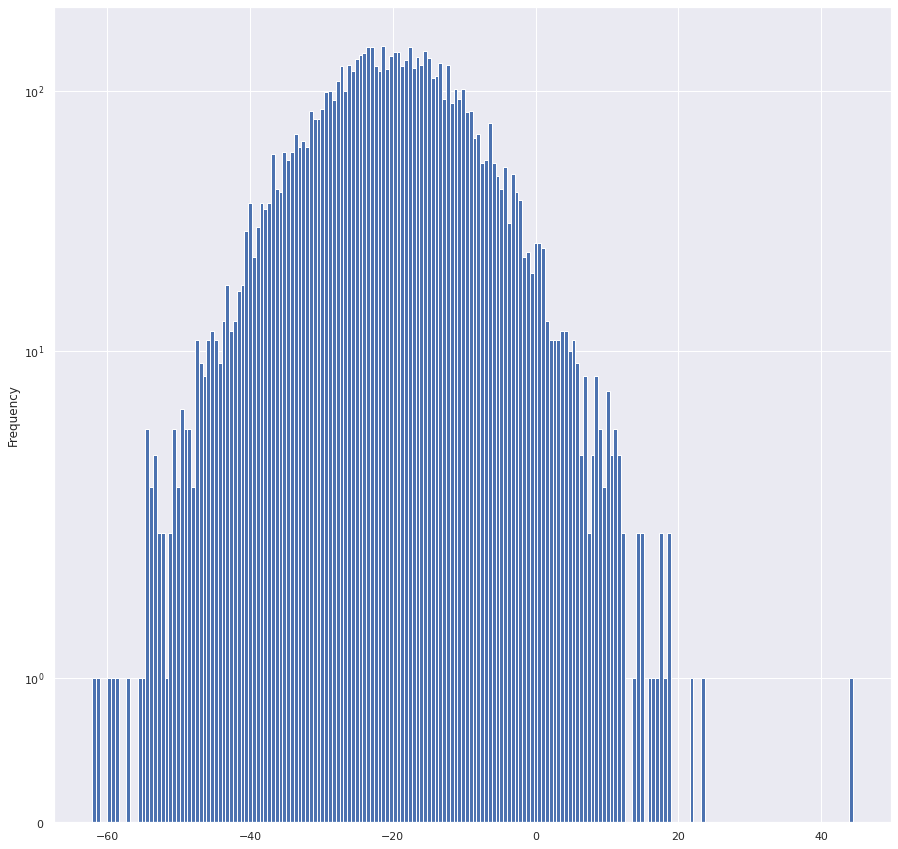

MFCC_mean9


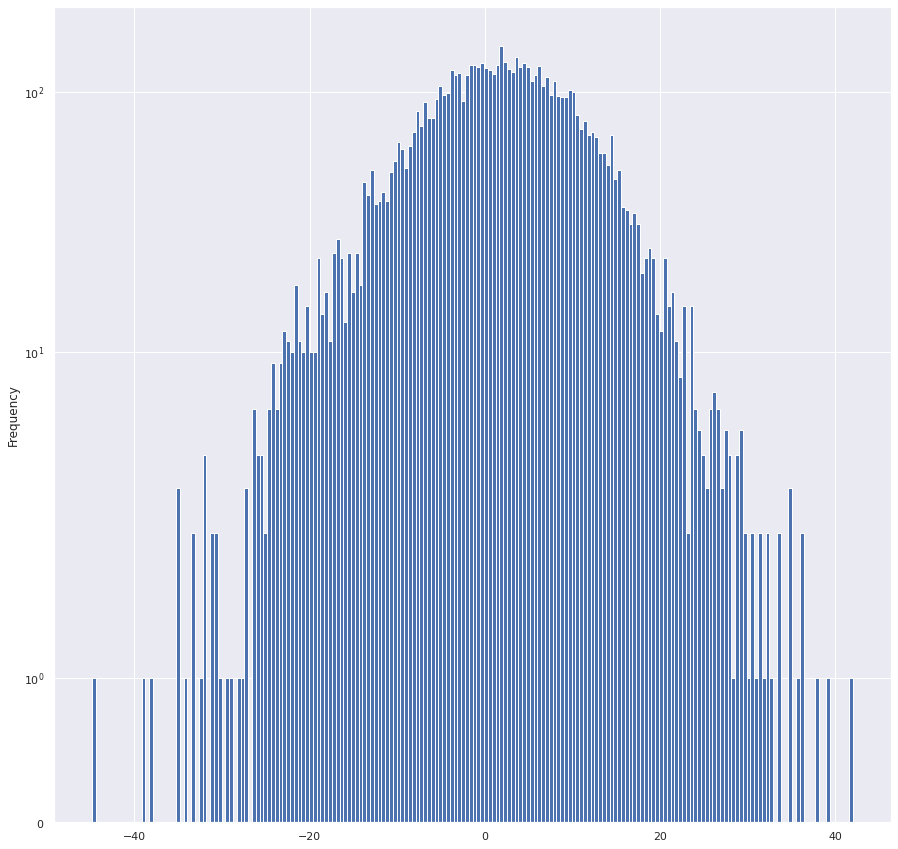

MFCC_mean10


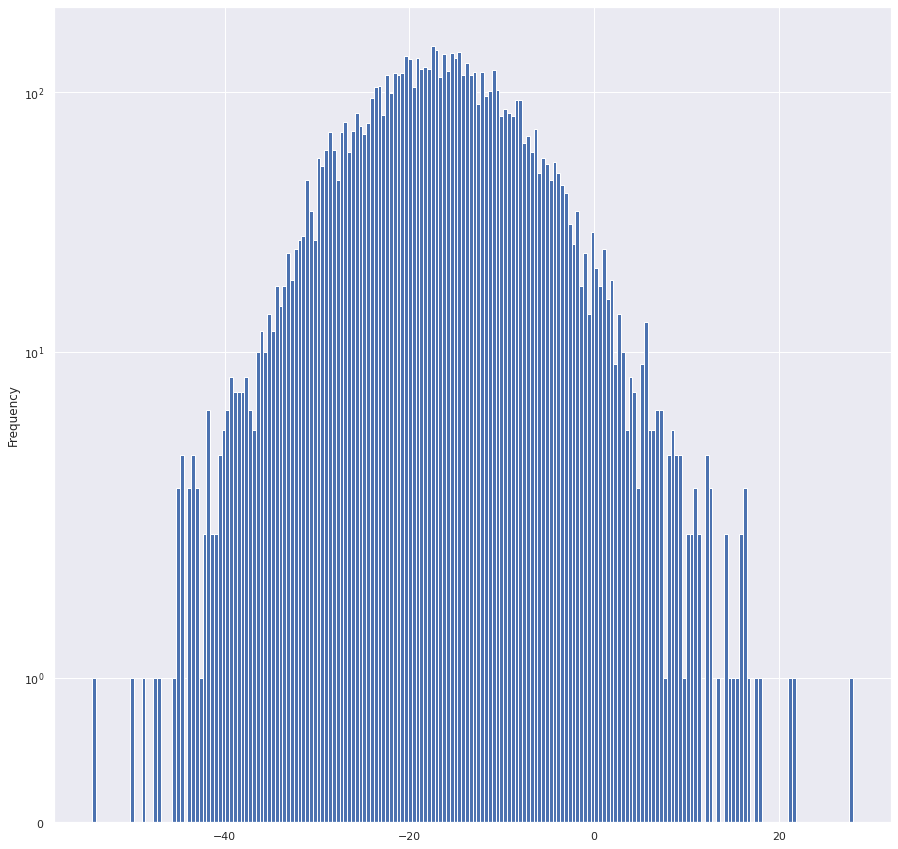

MFCC_mean11


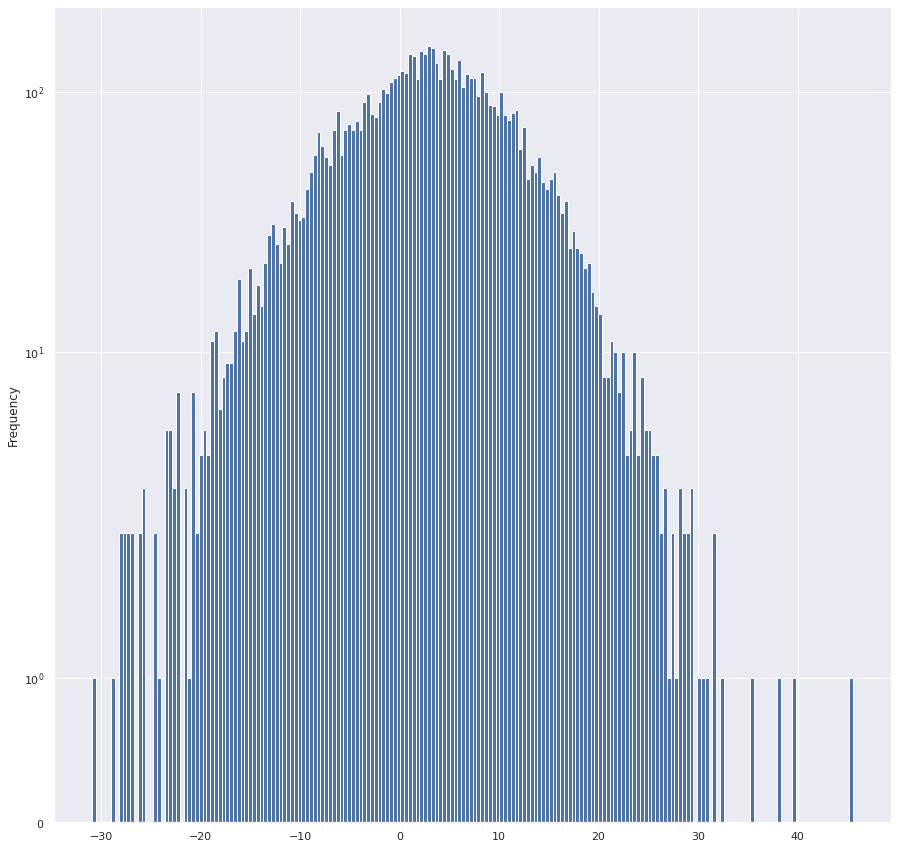

MFCC_mean12


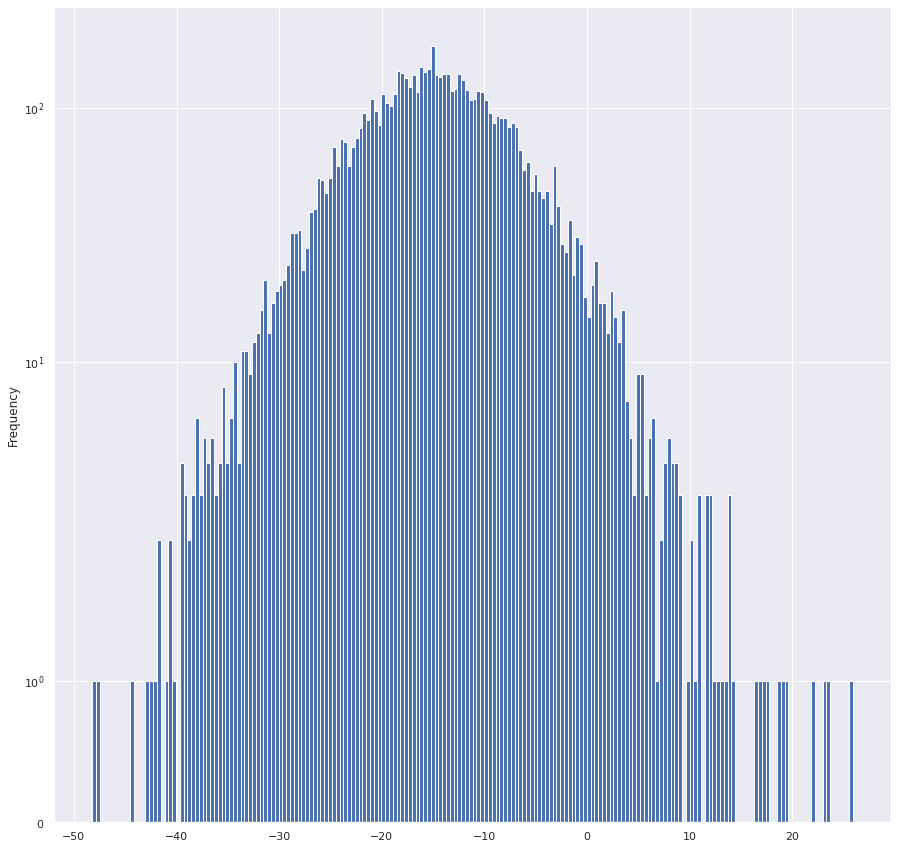

MFCC_std0


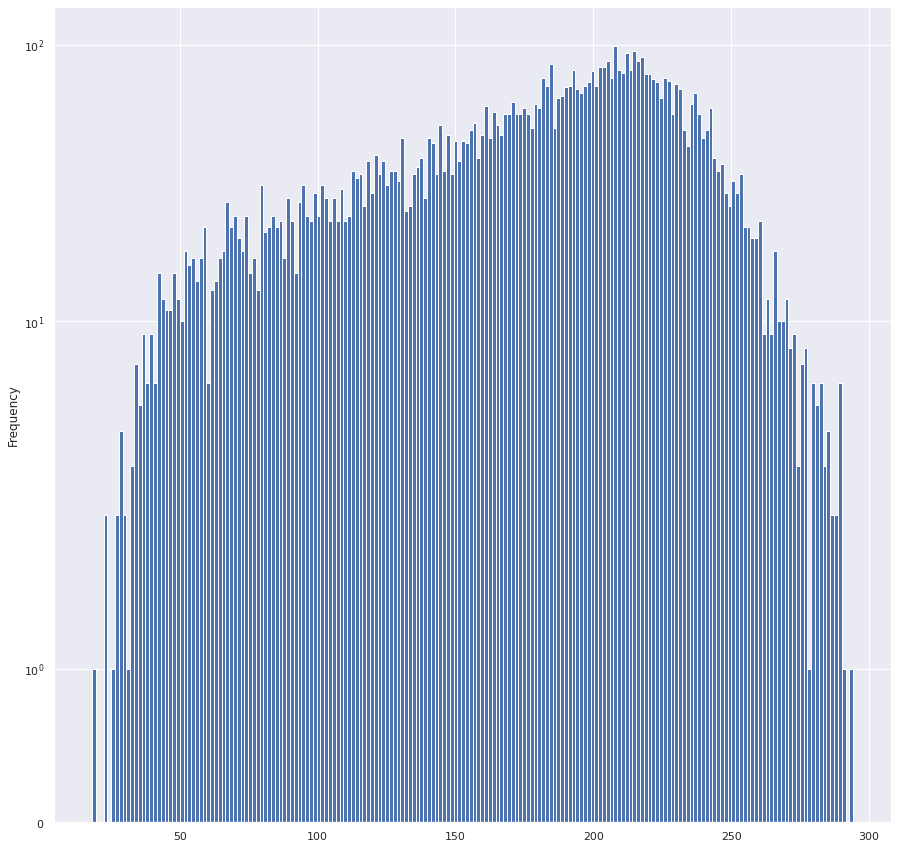

MFCC_std1


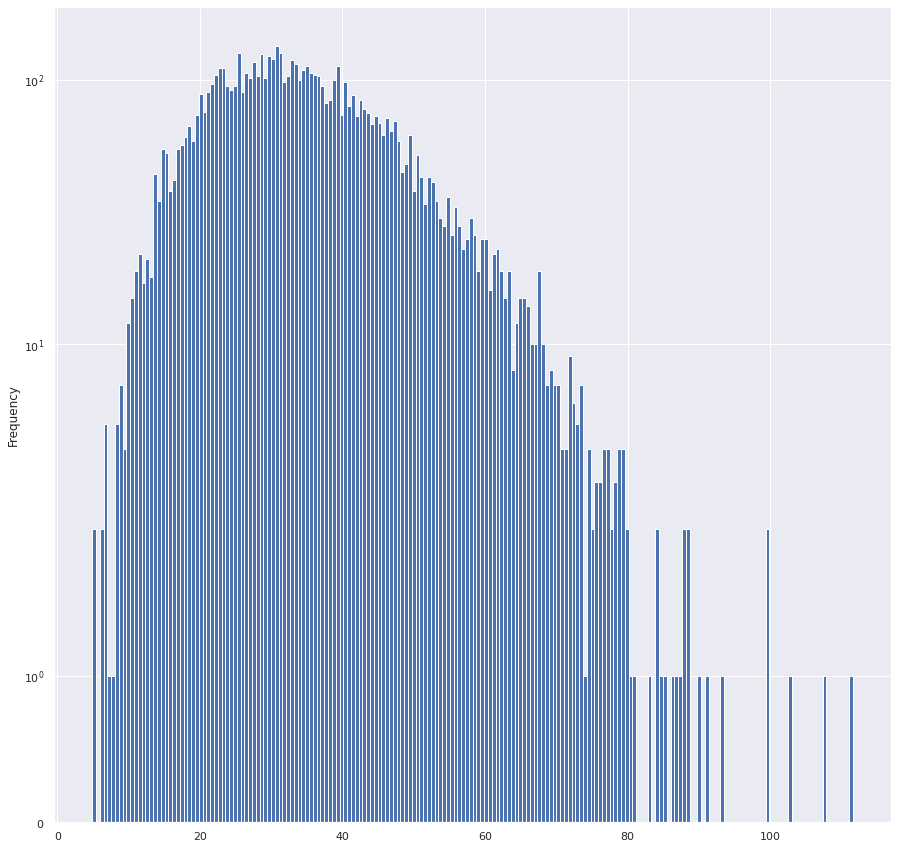

MFCC_std2


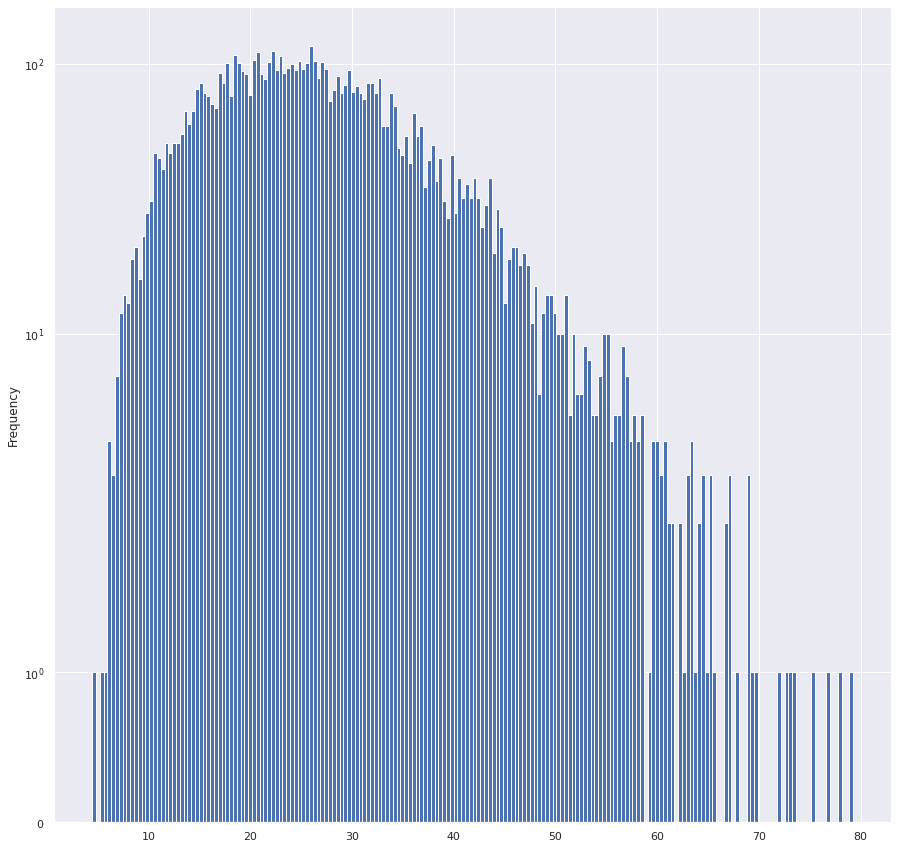

MFCC_std3


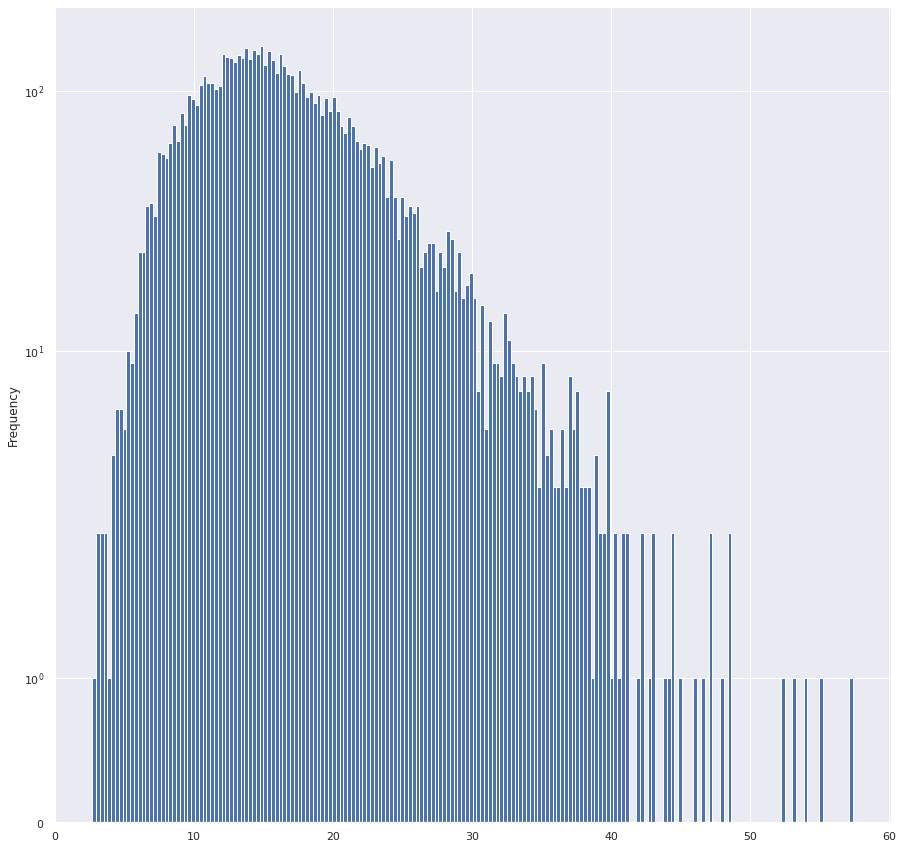

MFCC_std4


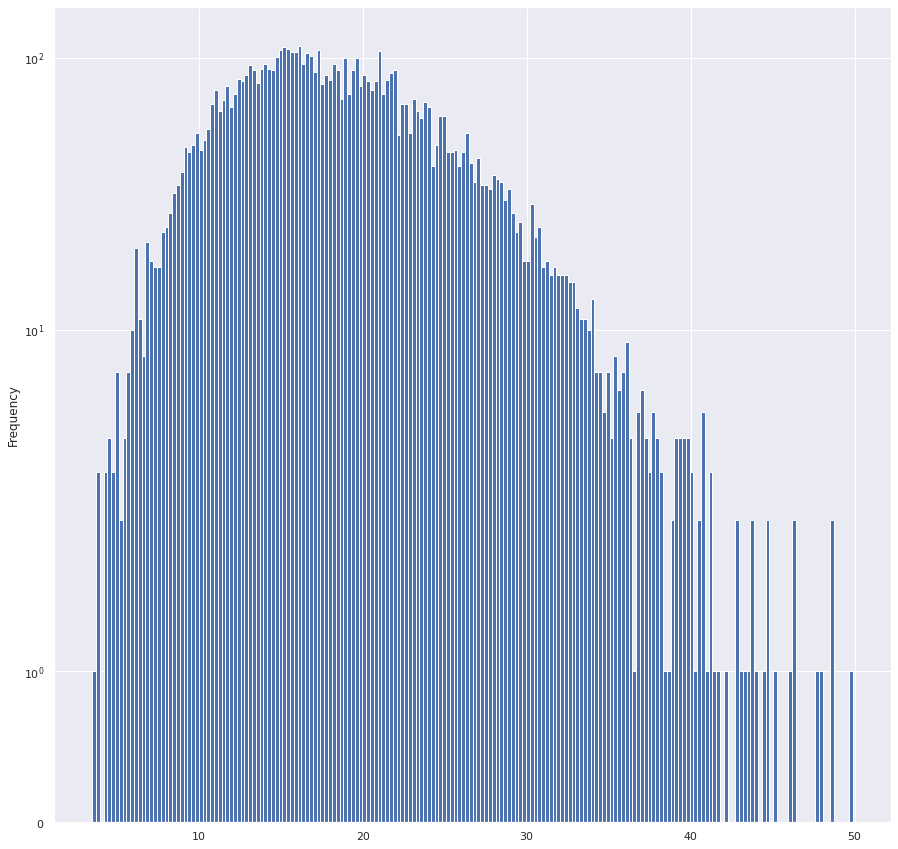

MFCC_std5


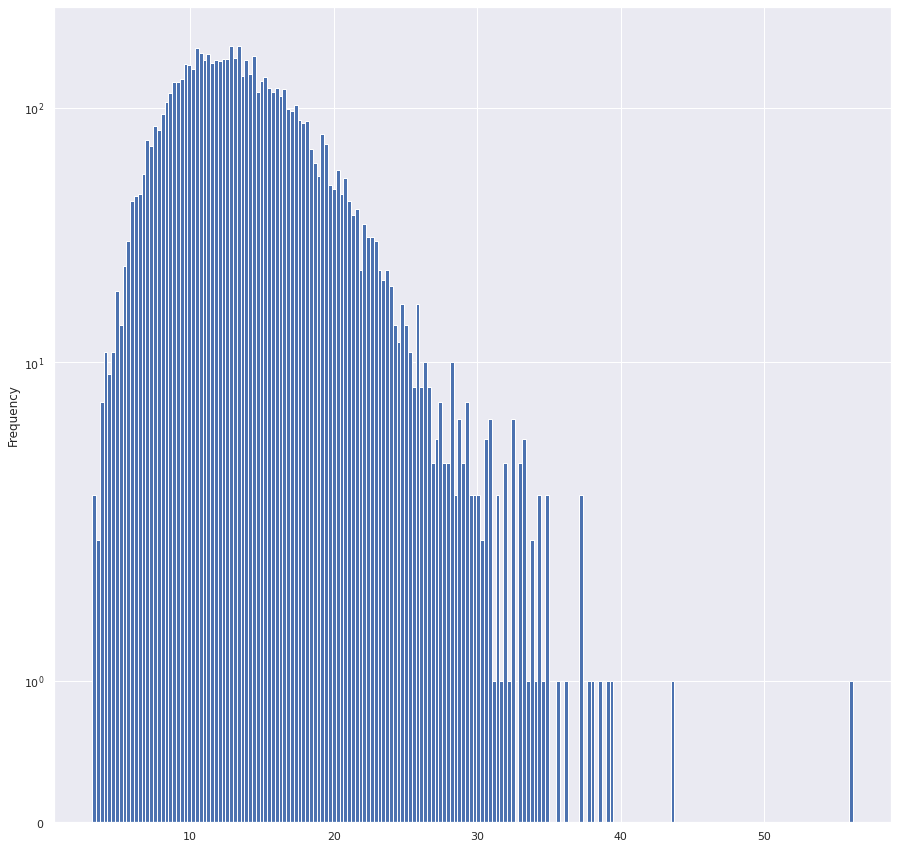

MFCC_std6


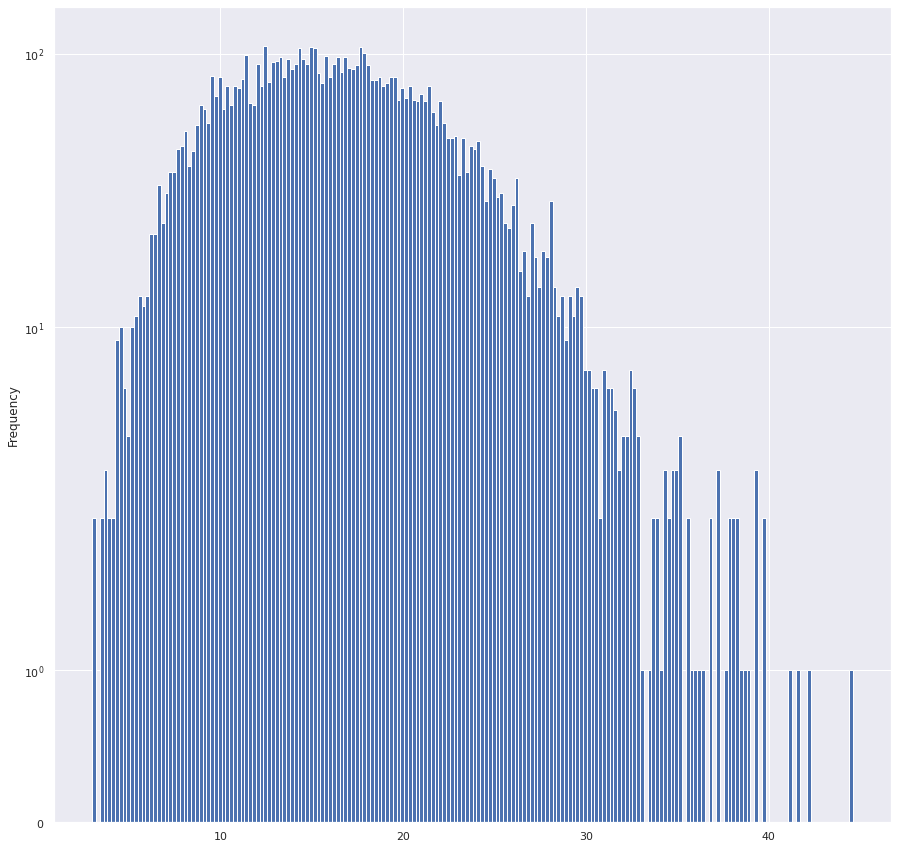

MFCC_std7


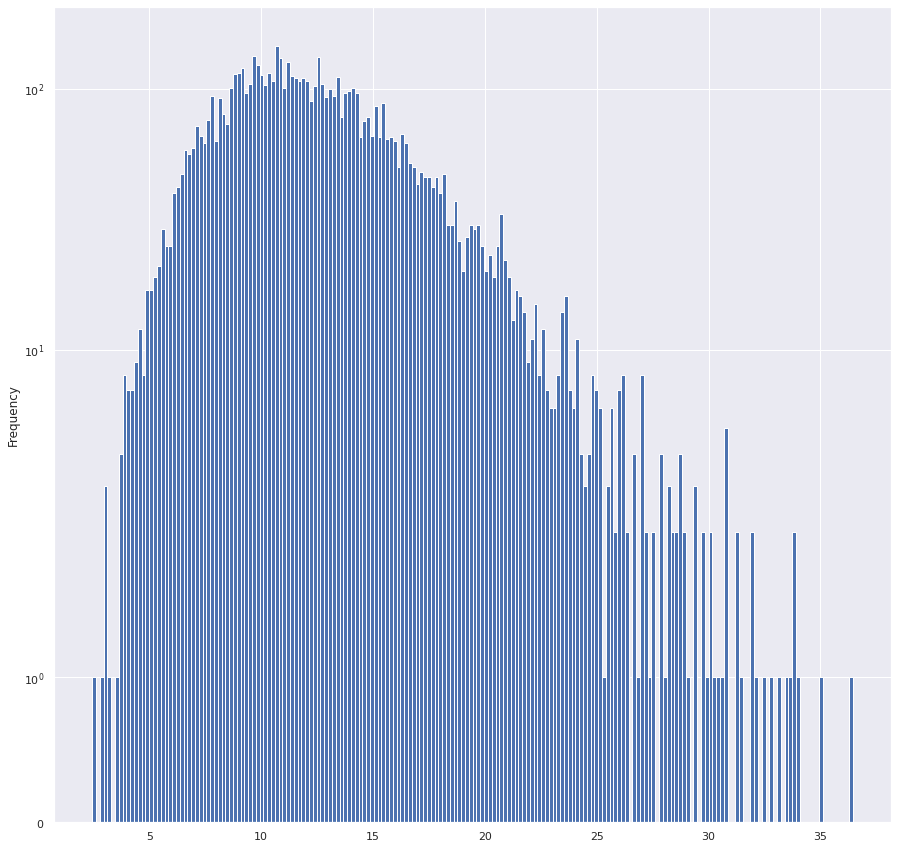

MFCC_std8


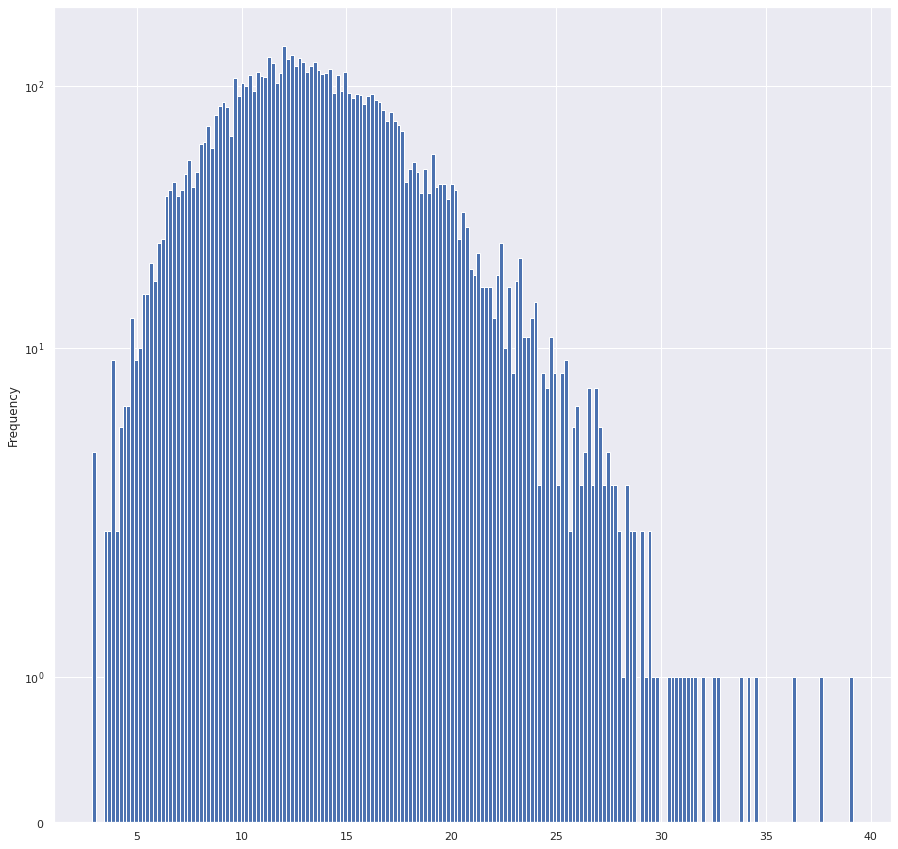

MFCC_std9


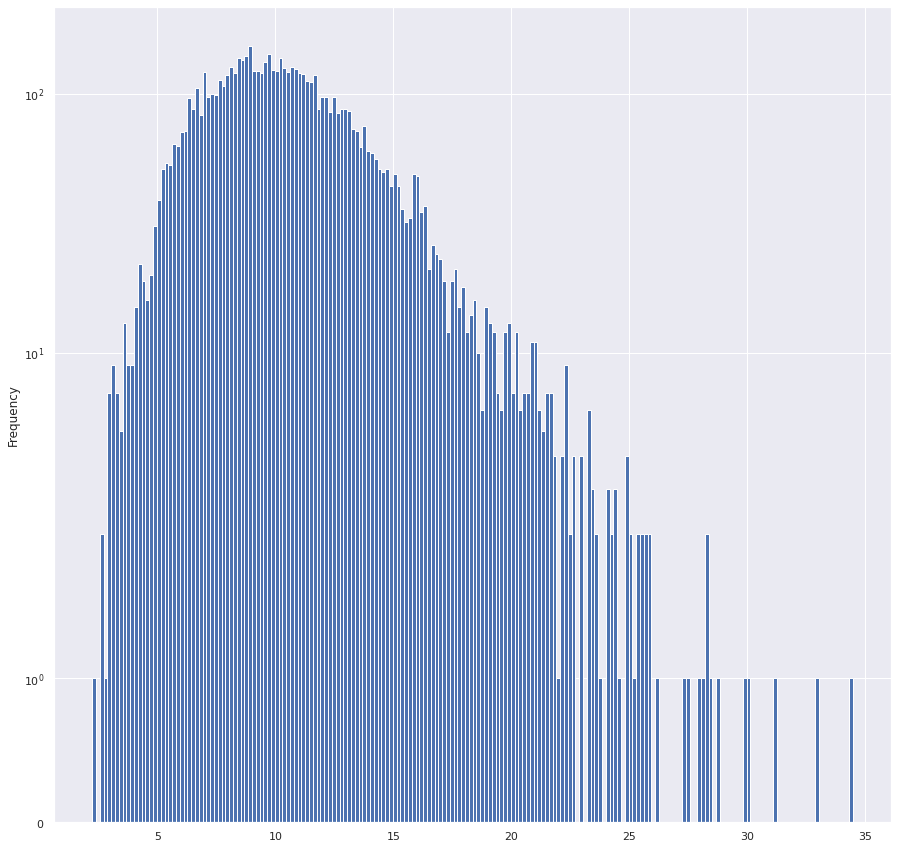

MFCC_std10


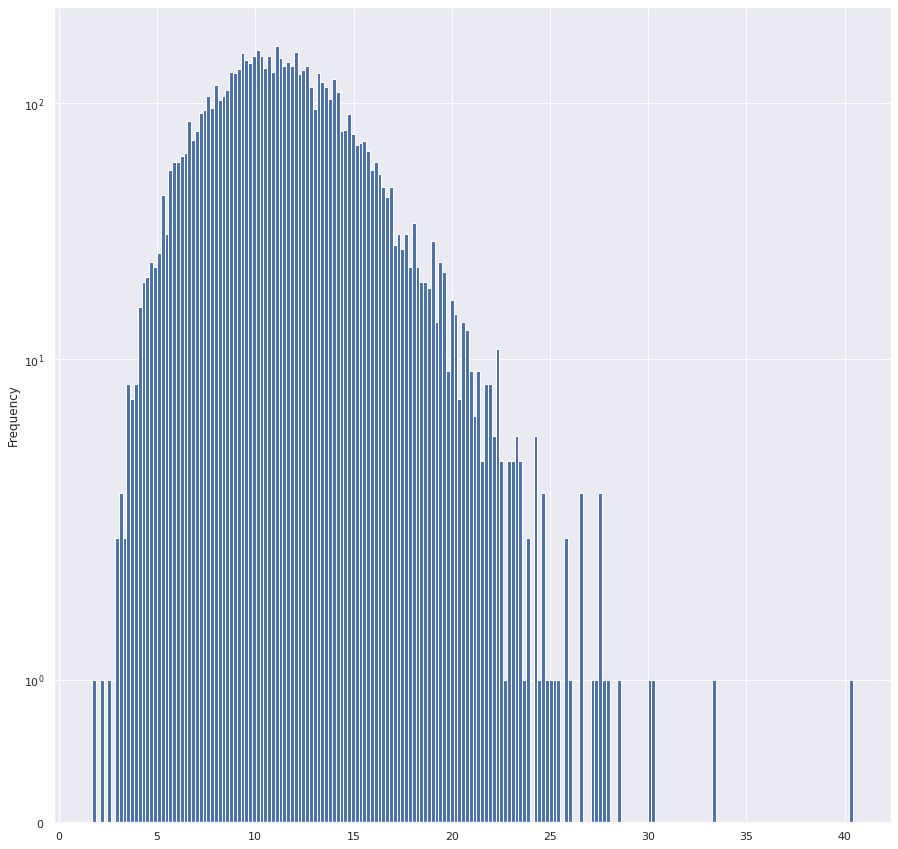

MFCC_std11


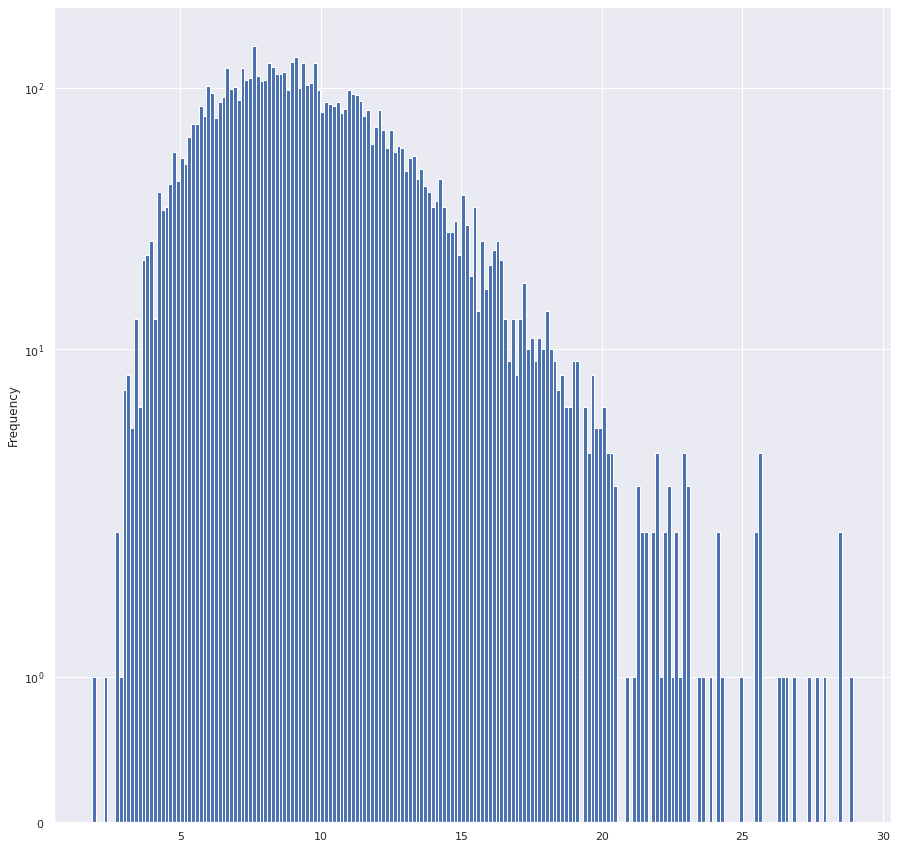

MFCC_std12


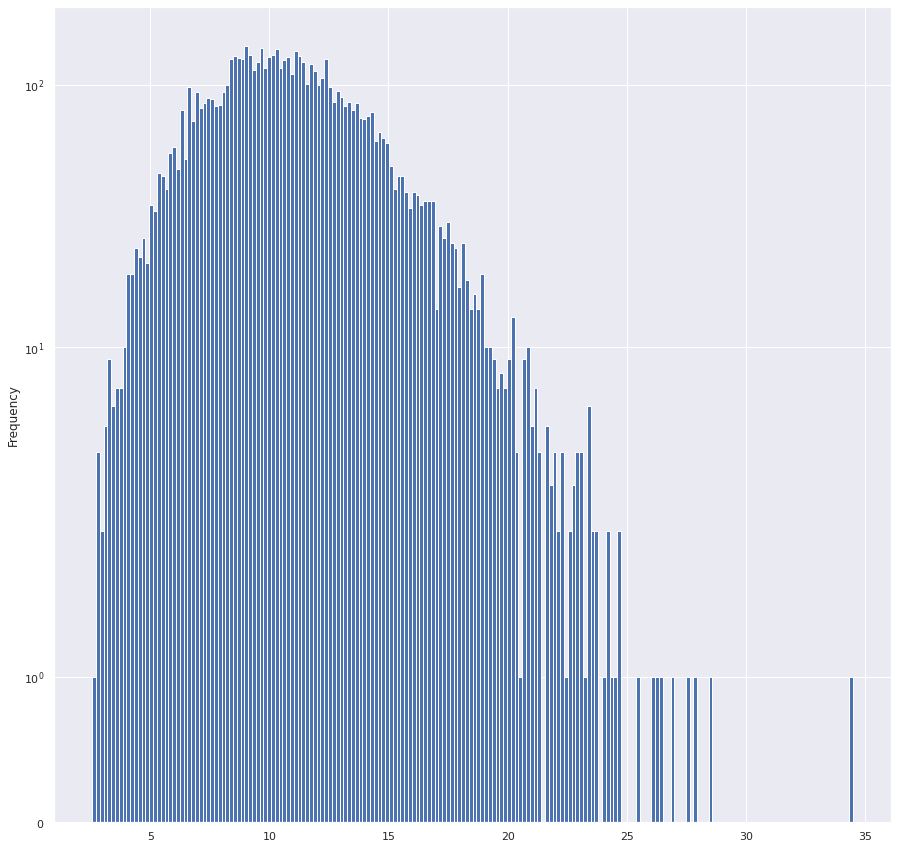

Crest_Factor


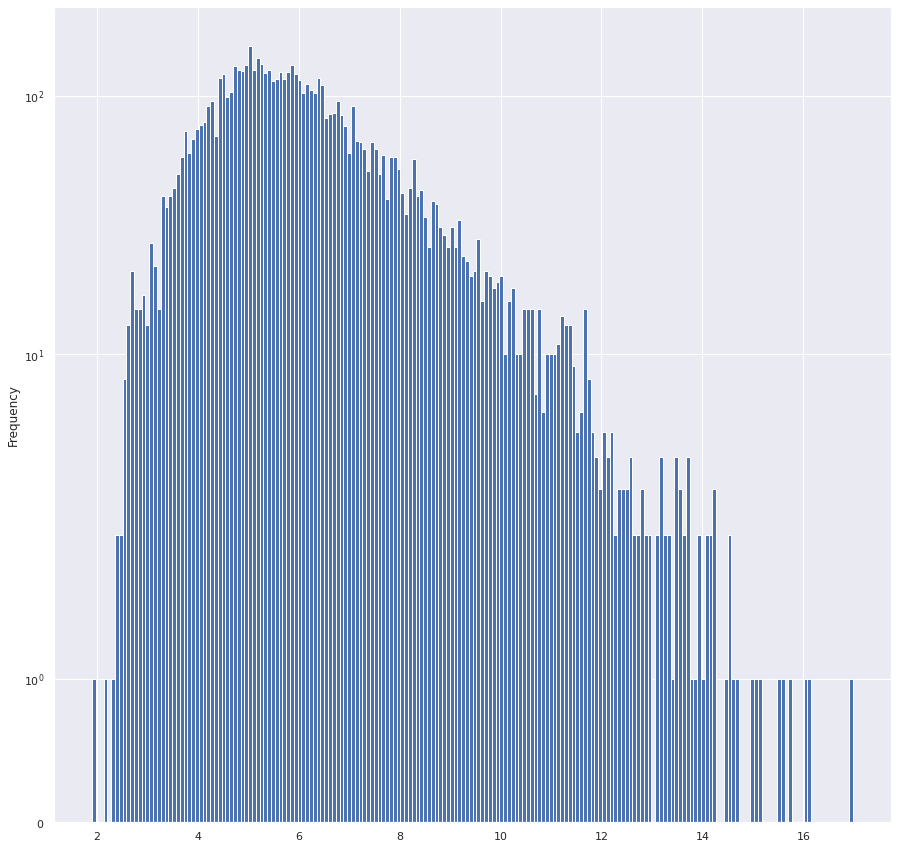

Cough_Length


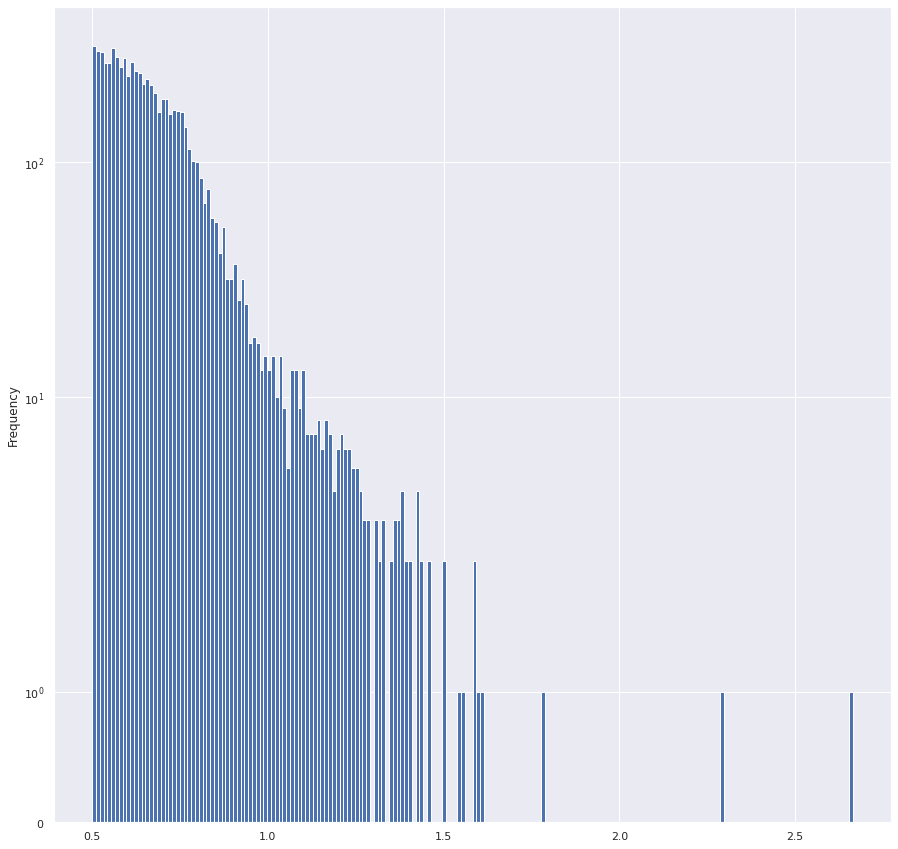

PSD_225-425


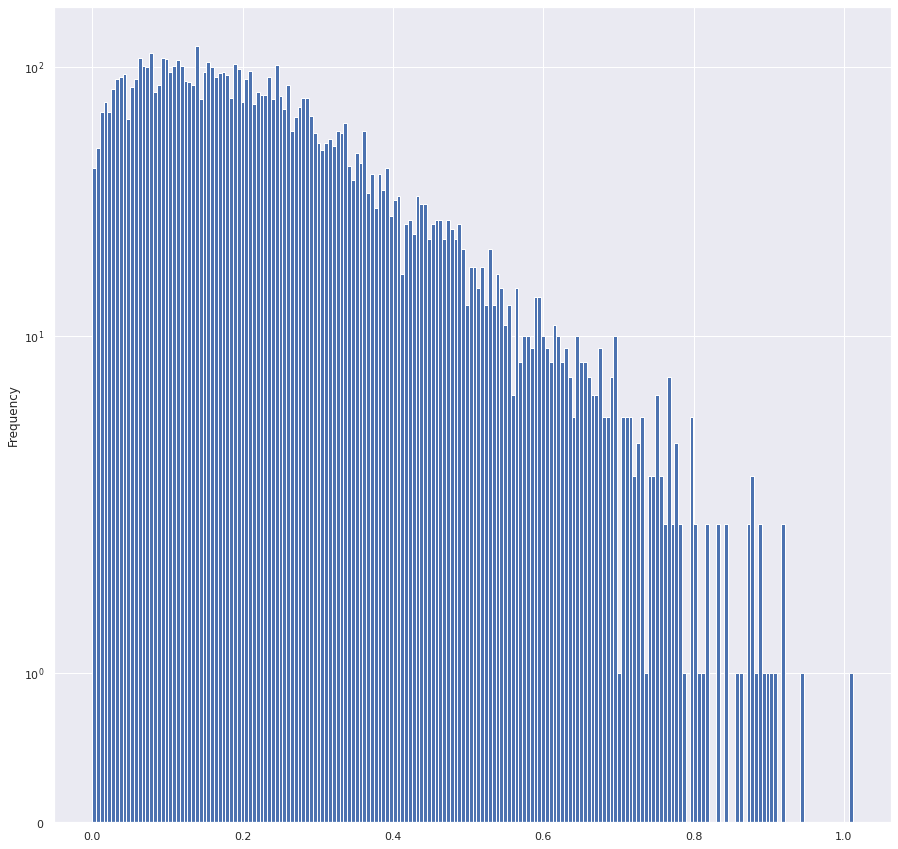

PSD_450-550


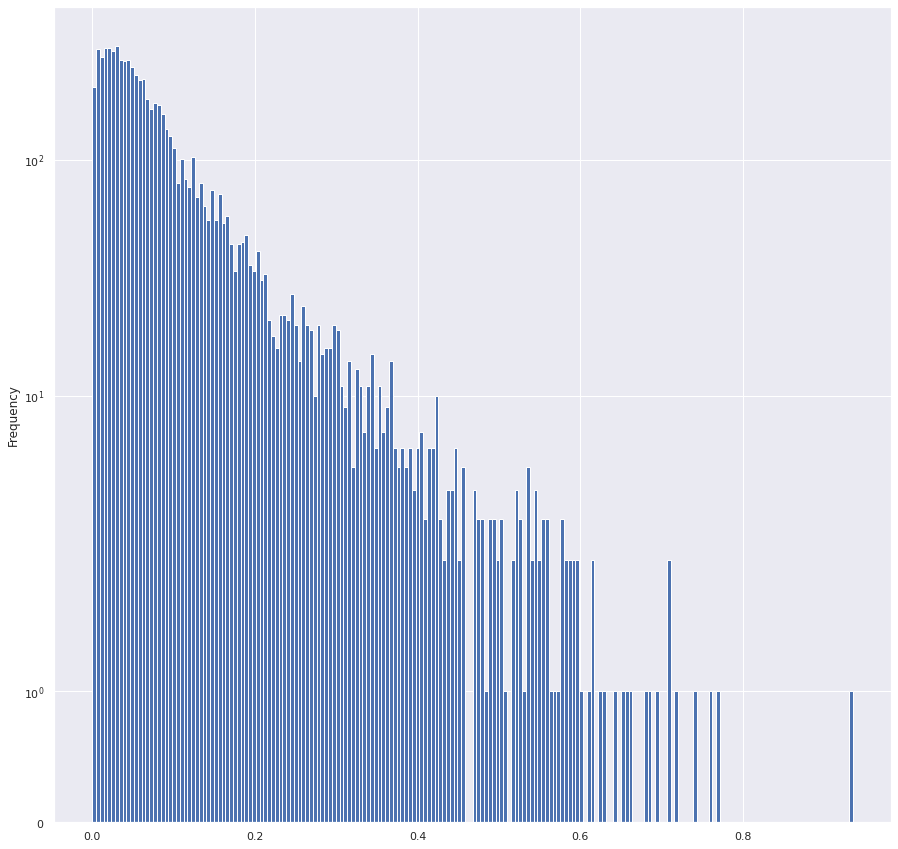

PSD_1325-1600


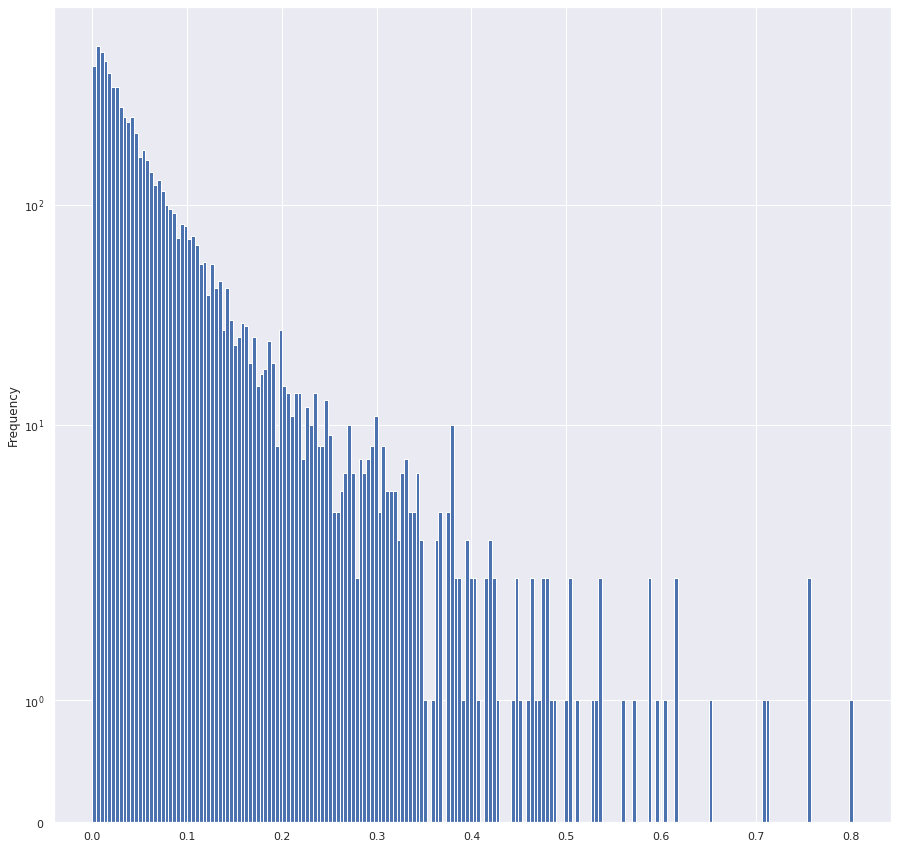

PSD_1600-1900


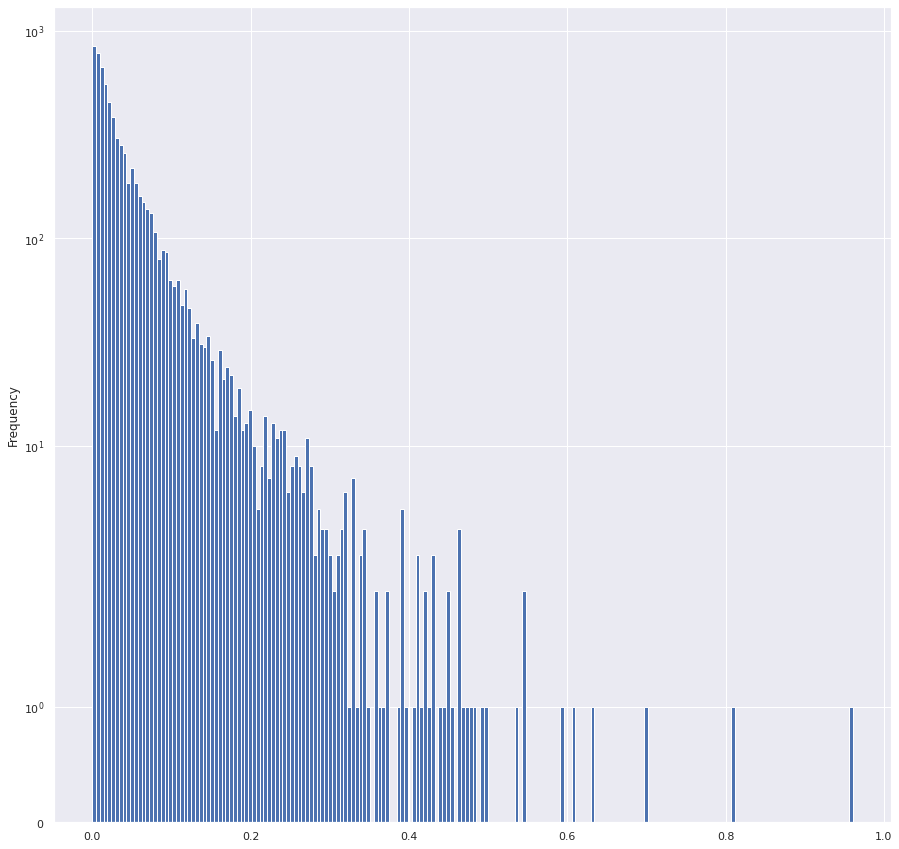

PSD_2500-2900


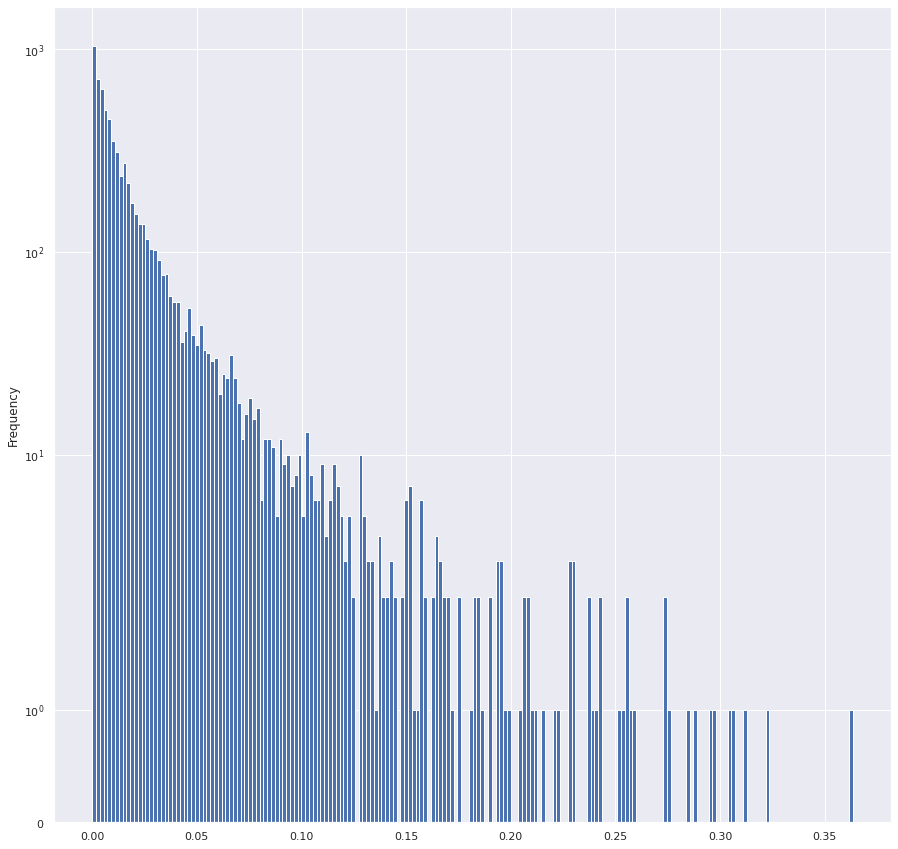

PSD_3100-3700


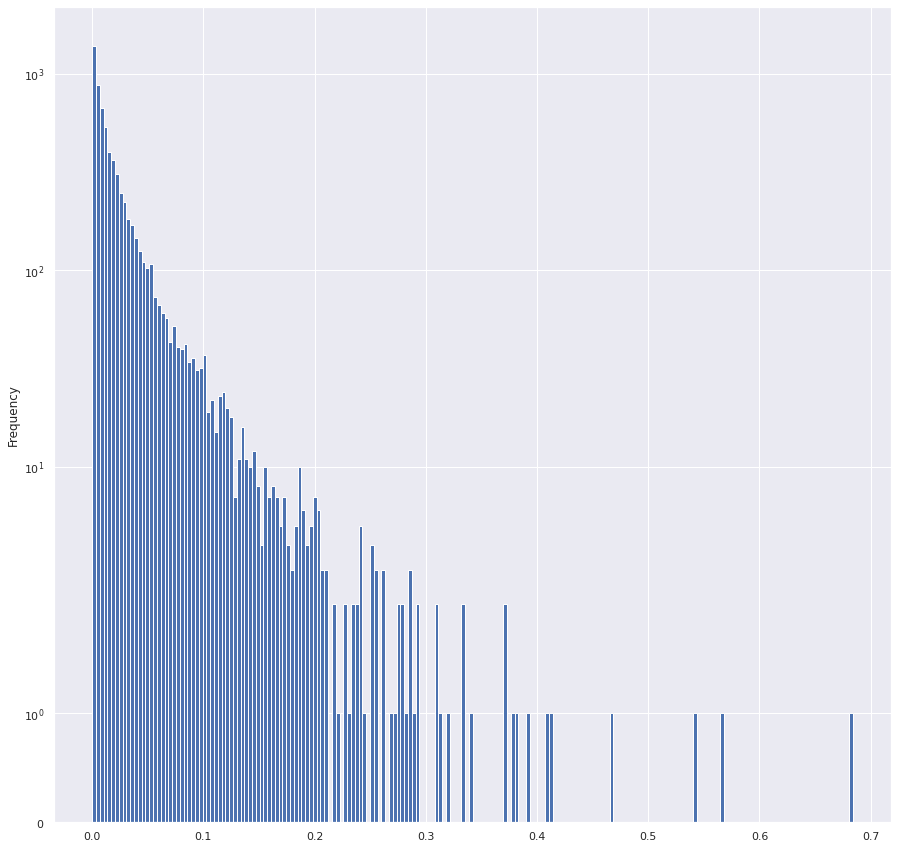

Age


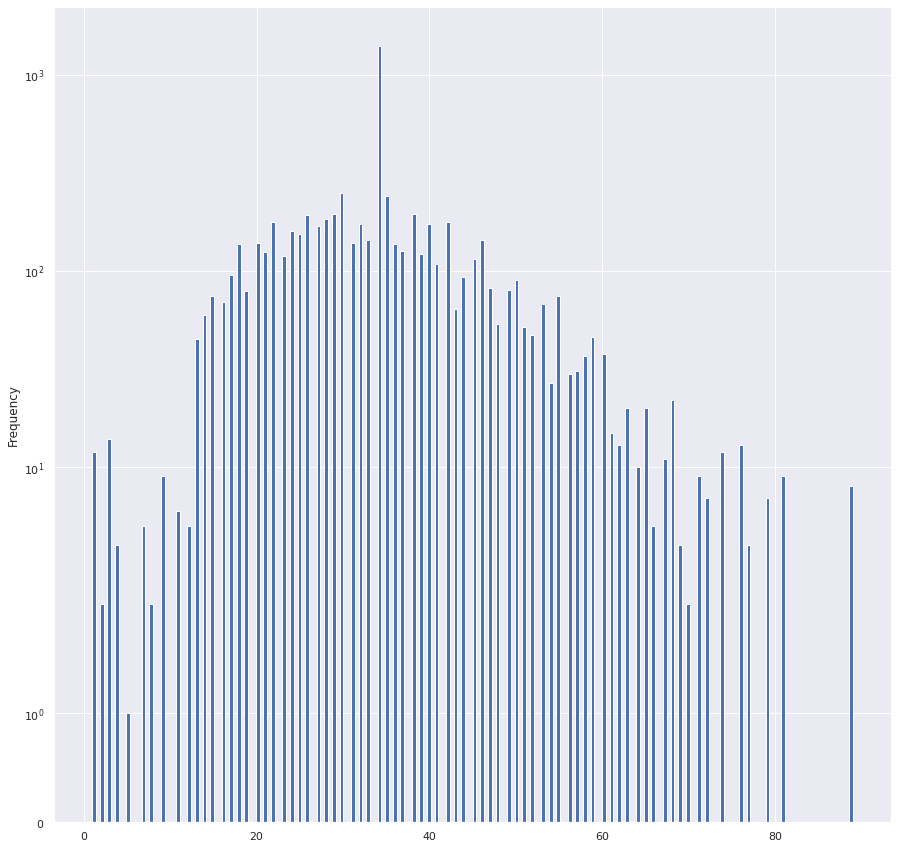

Gender


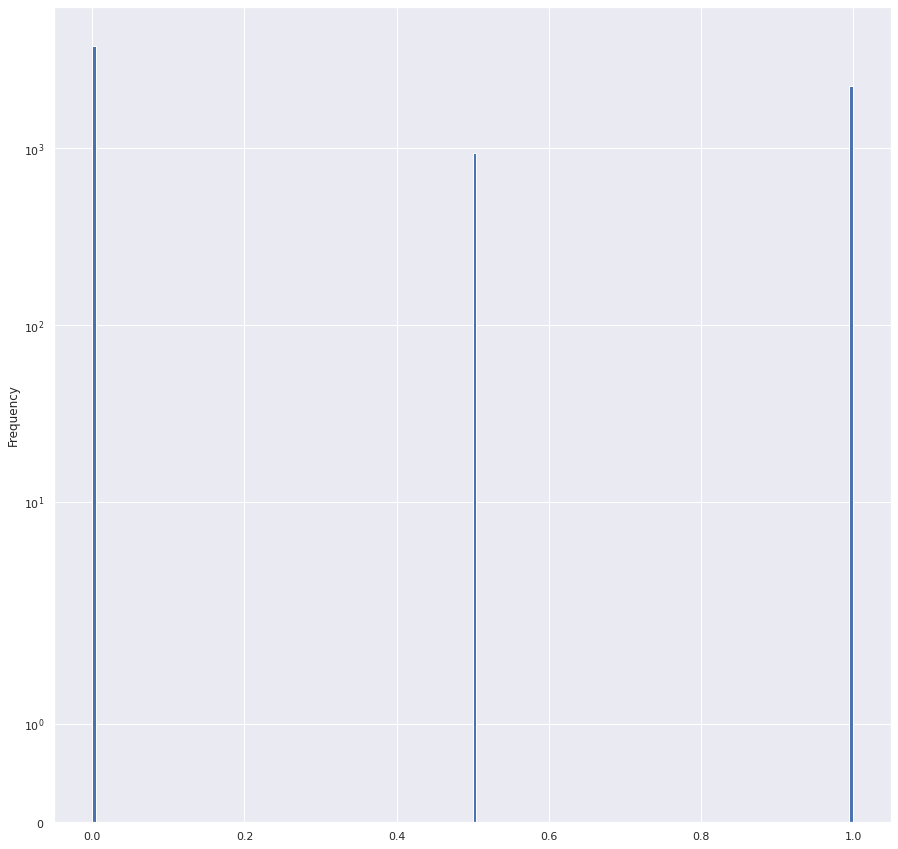

Resp_Condition


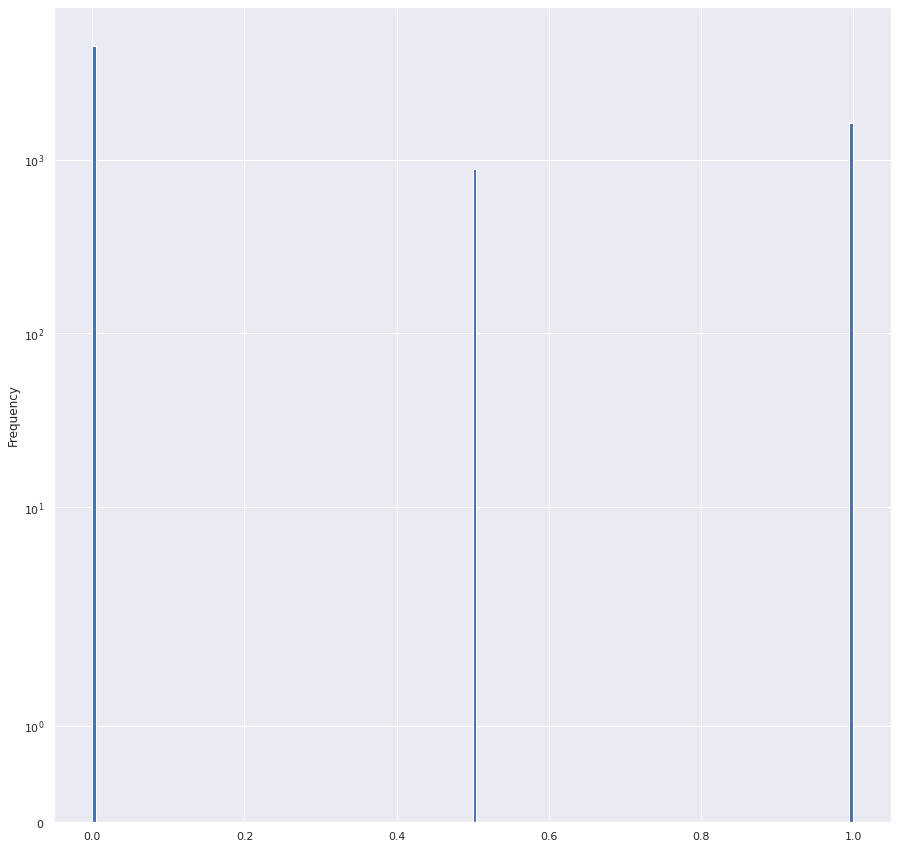

Symptoms


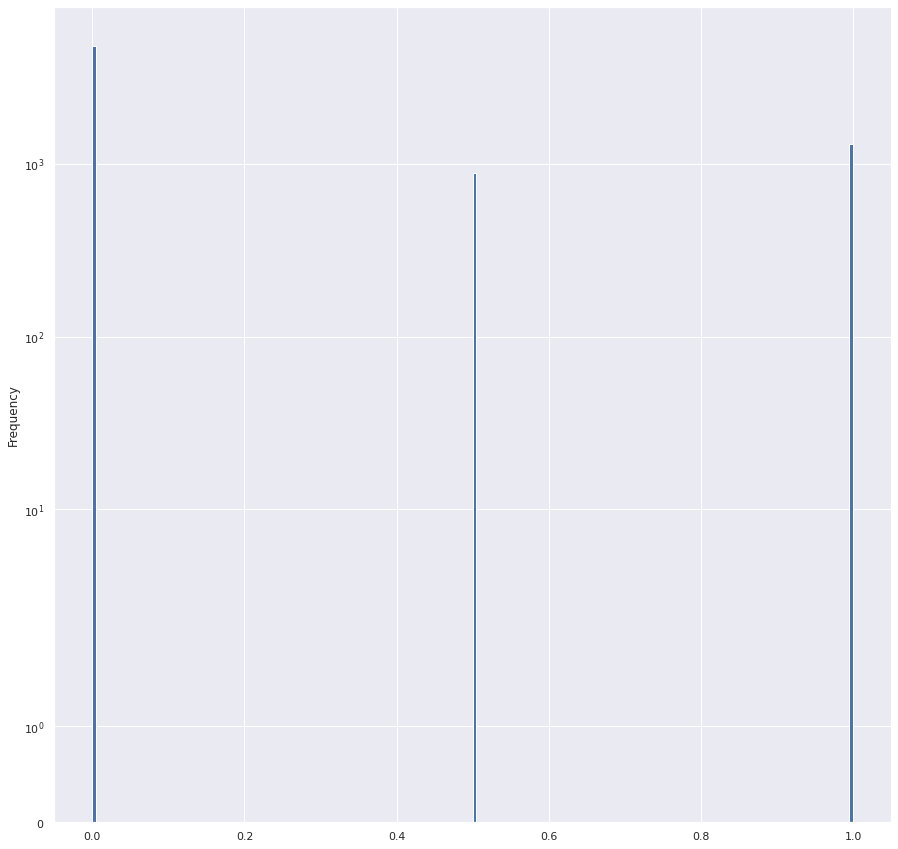

In [50]:
for feature in X.columns:
    print(feature)
    X[feature].plot(kind="hist", figsize=(15, 15), bins=200, logy="sym")
    plt.show()

<AxesSubplot:>

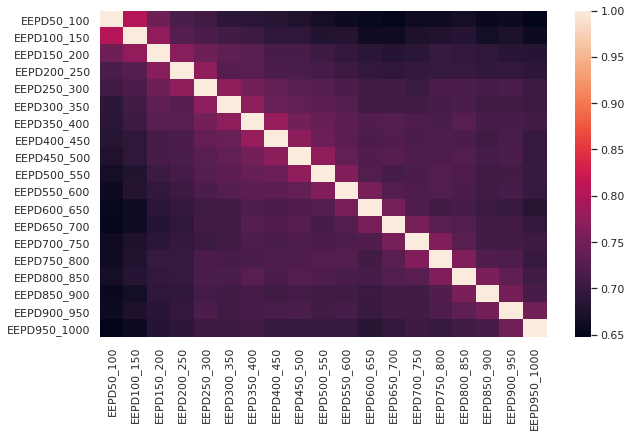

In [5]:
# correlations

fig = plt.figure(figsize=(10, 6))

sns.heatmap(X[FEATURES['EEPD']].corr())

<AxesSubplot:>

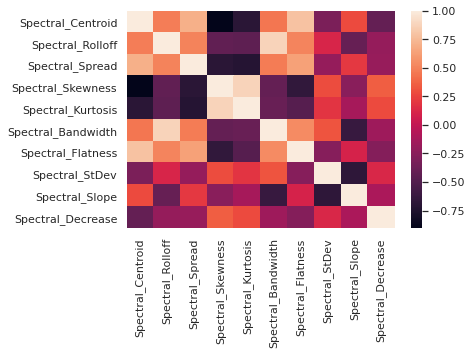

In [6]:
fig = plt.figure(figsize=(6, 4))

sns.heatmap(X[FEATURES['SPECTRAL']].corr())

<AxesSubplot:>

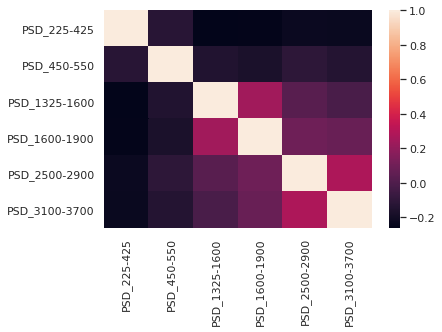

In [7]:
fig = plt.figure(figsize=(6, 4))

sns.heatmap(X[FEATURES['PSD']].corr())

<AxesSubplot:>

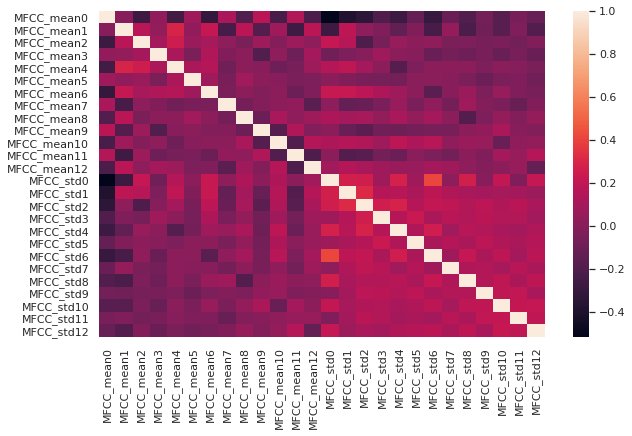

In [8]:
fig = plt.figure(figsize=(10, 6))

sns.heatmap(X[FEATURES['MFCC']].corr())

In [9]:
# fig = plt.figure(figsize=(6, 4))

# sns.heatmap(X[FEATURES['ADDITIONAL']].corr())